In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import scipy as sp
from sklearn.linear_model import LinearRegression

pd.set_option("display.max_columns", 100)

In [2]:
df = pd.read_csv('Ames_HousePrice.csv')

In [3]:
df.shape

(2580, 82)

In [4]:
df.isna().sum(axis=0).sort_values(ascending=False).head(30)

PoolQC           2571
MiscFeature      2483
Alley            2412
Fence            2055
FireplaceQu      1241
LotFrontage       462
GarageFinish      129
GarageQual        129
GarageYrBlt       129
GarageCond        129
GarageType        127
BsmtExposure       71
BsmtFinType2       70
BsmtFinType1       69
BsmtCond           69
BsmtQual           69
MasVnrArea         14
MasVnrType         14
BsmtHalfBath        2
BsmtFullBath        2
GarageArea          1
GarageCars          1
Electrical          1
BsmtUnfSF           1
BsmtFinSF2          1
BsmtFinSF1          1
TotalBsmtSF         1
Functional          0
EnclosedPorch       0
PavedDrive          0
dtype: int64

In [5]:
df[['SaleCondition']].value_counts()

SaleCondition
Normal           2414
Partial            82
Abnorml            61
Family             17
Alloca              4
AdjLand             2
dtype: int64

In [6]:
df.loc[df['SaleCondition'] == 'Normal', 'Top'] = 1
df.loc[df['SaleCondition'] == 'Partial', 'Top'] = 2
df.loc[df['SaleCondition'] == 'Abnorml', 'Top'] = 3
df.loc[df['SaleCondition'] == 'Family', 'Top'] = 4
df.loc[df['SaleCondition'] == 'Alloca', 'Top'] = 5
df.loc[df['SaleCondition'] == 'AdjLand', 'Top'] = 6
df = df.sort_values(by=['Top'], ascending=True) 

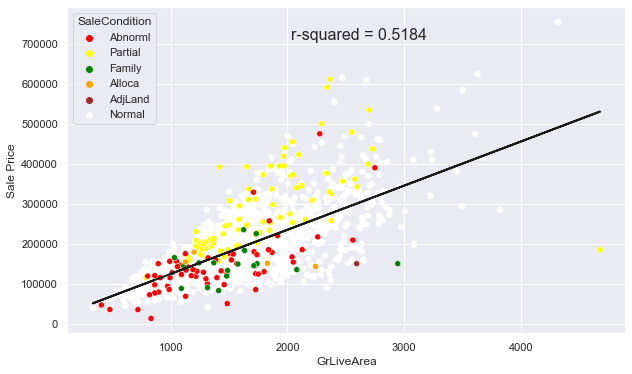

In [7]:
regressor = LinearRegression()

y = df['SalePrice'].values.reshape(-1,1)
x = df['GrLivArea'].values.reshape(-1,1)
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

#plt.scatter(x,y, c='green', alpha=0.3)

color_dict = dict({'Abnorml':'red',
                  'Partial':'yellow',
                  'Family':'green',
                  'Alloca':'orange',
                  'AdjLand':'brown',
                  'Normal':'white'})

plt.xlabel('GrLiveArea')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
#plt.show();

sns.scatterplot(x='GrLivArea', y='SalePrice', hue='SaleCondition', 
                hue_order=['Abnorml','Partial','Family','Alloca','AdjLand','Normal'],
                palette = color_dict,
                data=df);

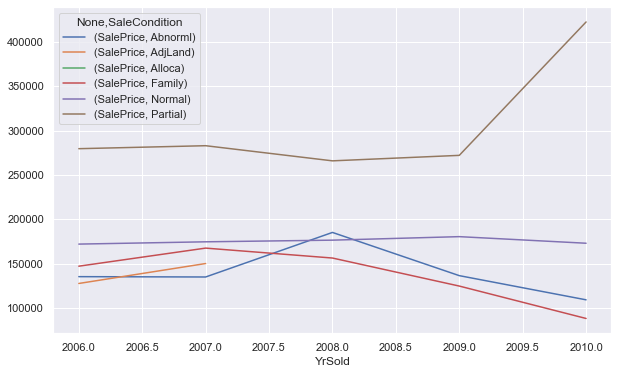

In [8]:
df.groupby(['YrSold','SaleCondition'])[['SalePrice']].mean().unstack().plot();

In [9]:
Normal = df[df['SaleCondition'] == 'Normal']
Normal.shape

(2414, 83)

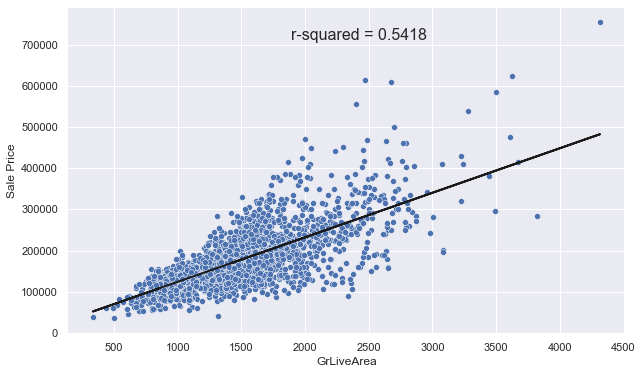

In [10]:
regressor = LinearRegression()

y = Normal['SalePrice'].values.reshape(-1,1)
x = Normal['GrLivArea'].values.reshape(-1,1)
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

#plt.scatter(x,y, c='green', alpha=0.3)
plt.xlabel('GrLiveArea')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
#plt.show();

sns.scatterplot(x='GrLivArea', y='SalePrice', #hue='SaleCondition', 
                #hue_order=['Partial','Abnorml','Family','Alloca','AdjLand'], 
                data=Normal);

In [11]:
df.groupby('SaleCondition')[['SalePrice']].mean()

SalePrice
SaleCondition               
Abnorml        143739.754098
AdjLand        138750.000000
Alloca         156766.500000
Family         146958.823529
Normal         175575.278790
Partial        285172.121951

In [12]:
df.groupby('SaleCondition').mean()

Unnamed: 0           PID    GrLivArea      SalePrice  \
SaleCondition                                                         
Abnorml        501.360656  7.535015e+08  1382.475410  143739.754098   
AdjLand        301.500000  9.086397e+08  1802.000000  138750.000000   
Alloca         415.500000  8.119759e+08  1599.000000  156766.500000   
Family         504.470588  6.631842e+08  1563.941176  146958.823529   
Normal         433.231980  7.181787e+08  1477.509528  175575.278790   
Partial        474.060976  5.887210e+08  1784.841463  285172.121951   

               MSSubClass  LotFrontage       LotArea  OverallQual  \
SaleCondition                                                       
Abnorml         56.393443    69.944444  10263.131148     5.377049   
AdjLand         90.000000    49.000000   9365.000000     5.500000   
Alloca          67.500000    83.500000  11259.500000     5.250000   
Family          56.764706    64.571429  12029.647059     6.058824   
Normal          57.974316    68.217524  10061.177299     6.008285   
Partial         49.268293    75.222222  11316.963415     7.707317   

               OverallCond    YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
SaleCondition                                                                   
Abnorml           5.377049  1960.245902   1976.622951   85.229508  481.150000   
AdjLand           5.500000  1949.000000   1962.500000  177.500000  673.500000   
Alloca            5.500000  1963.250000   1982.500000   34.500000  574.500000   
Family            5.058824  1965.764706   1973.000000  170.000000  331.352941   
Normal            5.649544  1969.424192   1983.260563   96.041615  439.233223   
Partial           5.012195  2005.804878   2006.329268  195.632911  579.426829   

               BsmtFinSF2   BsmtUnfSF  TotalBsmtSF     1stFlrSF    2ndFlrSF  \
SaleCondition                                                                 
Abnorml         57.066667  468.516667  1006.733333  1120.327869  260.278689   
AdjLand          0.000000  462.500000  1136.000000  1154.000000  648.000000   
Alloca           0.000000  265.750000   840.250000  1097.500000  501.500000   
Family          40.823529  734.588235  1106.764706  1218.941176  319.352941   
Normal          55.101906  528.442005  1022.777133  1133.853355  339.347556   
Partial          2.060976  879.231707  1460.719512  1477.487805  307.353659   

               LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
SaleCondition                                                                 
Abnorml            1.868852      0.500000      0.066667  1.459016  0.245902   
AdjLand            0.000000      1.000000      1.000000  2.000000  0.000000   
Alloca             0.000000      1.000000      0.000000  2.000000  0.000000   
Family            25.647059      0.176471      0.176471  1.470588  0.588235   
Normal             4.308616      0.430584      0.062163  1.538940  0.378210   
Partial            0.000000      0.536585      0.012195  1.951220  0.463415   

               BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
SaleCondition                                                         
Abnorml            2.836066      1.081967      6.163934    0.459016   
AdjLand            5.000000      1.000000      8.000000    0.000000   
Alloca             3.750000      1.250000      7.250000    0.250000   
Family             3.176471      1.058824      6.823529    0.705882   
Normal             2.854184      1.040182      6.367026    0.603148   
Partial            2.585366      1.000000      6.975610    0.756098   

               GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
SaleCondition                                                                 
Abnorml        1966.886792    1.459016  402.770492   92.180328    43.934426   
AdjLand                NaN    0.000000    0.000000    0.000000   371.000000   
Alloca         1971.500000    1.333333  336.000000  112.000000    27.000000   
Family        

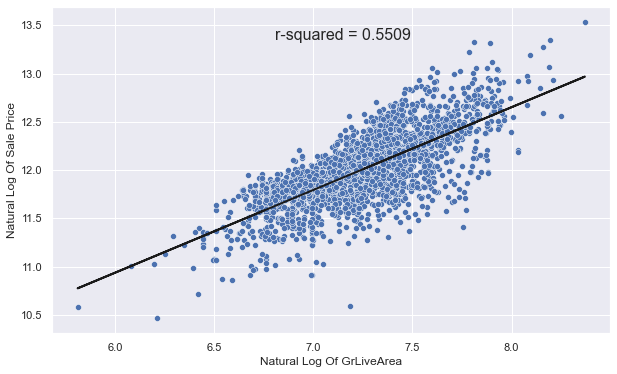

In [13]:
regressor = LinearRegression()

y = np.log(Normal['SalePrice'].values.reshape(-1,1))
x = np.log(Normal['GrLivArea'].values.reshape(-1,1))
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

#plt.scatter(x,y, c='green', alpha=0.3)
plt.xlabel('Natural Log Of GrLiveArea')
plt.ylabel('Natural Log Of Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
#plt.show();

sns.scatterplot(x=np.log(Normal['GrLivArea']), y=np.log(Normal['SalePrice']), #hue='SaleCondition', 
                #hue_order=['Partial','Abnorml','Family','Alloca','AdjLand'], 
                data=Normal);

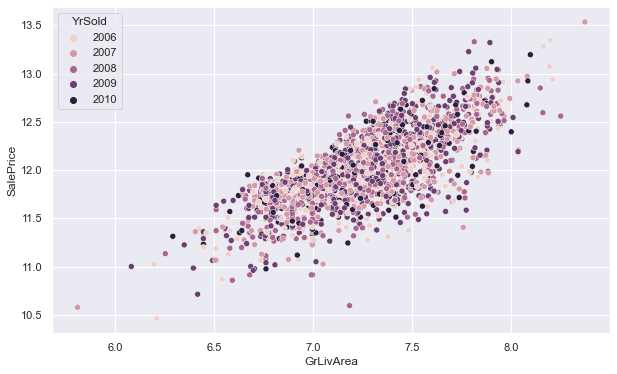

In [14]:
sns.scatterplot(x=np.log(Normal['GrLivArea']), y=np.log(Normal['SalePrice']), hue='YrSold', 
                #hue_order=['Partial','Abnorml','Family','Alloca','AdjLand'], 
                data=Normal);

In [15]:
categorical = df.select_dtypes('object')
categorical.head(3)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
1716       RL   Pave   NaN      Reg         HLS    AllPub    Inside       Gtl   
1717       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0           SWISU       Norm       Norm     1Fam     1Story     Gable   
1716      BrkSide       Norm       Norm     1Fam     1Story       Hip   
1717      Gilbert       Norm       Norm     1Fam       SLvl     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     Wd Sdng     Wd Sdng       None        TA        TA   
1716  CompShg     VinylSd     VinylSd       None        Fa        TA   
1717  CompShg     VinylSd     VinylSd       None        TA        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0        CBlock       TA       TA           No          Rec          Unf   
1716     CBlock       TA       TA           No          LwQ          Unf   
1717      PConc       Gd       TA           No          Unf          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        TA          Y      SBrkr          TA        Typ   
1716    GasA        Gd          Y      SBrkr          Fa        Typ   
1717    GasA        Ex          Y      SBrkr          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0             Gd     Detchd          Unf         TA         TA          Y   
1716         NaN        NaN          NaN        NaN        NaN          Y   
1717          TA    BuiltIn          RFn         TA         TA          Y   

     PoolQC Fence MiscFeature SaleType SaleCondition  
0       NaN   NaN         NaN      WD         Normal  
1716    NaN   NaN         NaN      WD         Normal  
1717    NaN   NaN         NaN      WD         Normal

In [16]:
c = categorical.columns
len(set(c))
#set(c)

43

In [17]:
numeric = df.select_dtypes('number')
numeric.head(3)

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass  LotFrontage  \
0              1  909176150        856     126000          30          NaN   
1716         717  534450150        708      82500          30         50.0   
1717         718  528290190       1430     156000          80         62.0   

      LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0        7890            6            6       1939          1950         0.0   
1716     5330            4            7       1940          1950         0.0   
1717     7750            7            5       1999          2000         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0          238.0         0.0      618.0        856.0       856         0   
1716       280.0         0.0      140.0        420.0       708         0   
1717         0.0         0.0      384.0        384.0       774       656   

      LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0           1.0           0.0         1         0   
1716             0           0.0           0.0         1         0   
1717             0           0.0           0.0         2         1   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0                2             1             4           1       1939.0   
1716             2             1             5           0          NaN   
1717             3             1             7           1       1999.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0            2.0       399.0           0            0              0   
1716         0.0         0.0         164            0              0   
1717         2.0       400.0           0            0              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  Top  
0             0          166         0        0       3    2010  1.0  
1716          0            0         0        0      12    2009  1.0  
1717          0            0         0        0       3    2009  1.0

In [18]:
n = numeric.columns
len(set(n))
#set(n)

40

In [19]:
len(set(list(n) + list(c)))

83

## Breaking Down Numerical Columns ##

In [20]:
#Target Variable is SalePrice (1 column)
Target = numeric[['SalePrice']]
Target.head(3)

SalePrice
0        126000
1716      82500
1717     156000

In [21]:
#IDs = 2 Columns
IDs = numeric[['Unnamed: 0', 'PID','Top']]
IDs.head(3)

Unnamed: 0        PID  Top
0              1  909176150  1.0
1716         717  534450150  1.0
1717         718  528290190  1.0

In [22]:
PID = IDs.rename(columns={'PID':'MapRefNo'})
PID.head(3)

Unnamed: 0   MapRefNo  Top
0              1  909176150  1.0
1716         717  534450150  1.0
1717         718  528290190  1.0

In [23]:
#NumCats - These are categorical data represented by numbers. Can be used for 
#subgrouping, but they have no mathematical meaning. You can't add them together. 

NumCats = numeric[['MSSubClass']]
NumCats.head(3)

MSSubClass
0             30
1716          30
1717          80

In [24]:
#Ordinal Data - Treated as categorical, but numbers have mathematical meaning. 

Ordinal = numeric[['OverallQual', 'OverallCond']]
Ordinal.head(3)

OverallQual  OverallCond
0               6            6
1716            4            7
1717            7            5

In [25]:
#Assumption - All "Year Variables" are Categorical. The ratio between two years
#is not meaningful which is why its not appropriate to classify it as a 
#quantitative variable.

#Create Separate List/DateFrame of Year Variables. Could come in handy to assess
#historical context (Great Depression, etc)

#Years = 5 Columns
Years = numeric[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']]
Years.head(3)

YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold
0          1939          1950       1939.0       3    2010
1716       1940          1950          NaN      12    2009
1717       1999          2000       1999.0       3    2009

In [26]:
#Bedroom Info (Discrete)
BR = numeric[['BedroomAbvGr']]
BR.head(3)

BedroomAbvGr
0                2
1716             2
1717             3

In [27]:
#Bathroom Info (Discrete):
Baths = numeric[['BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath']]
Baths.head(3)

BsmtFullBath  BsmtHalfBath  FullBath  HalfBath
0              1.0           0.0         1         0
1716           0.0           0.0         1         0
1717           0.0           0.0         2         1

In [28]:
#Questions -- Categories I'm not really sure what to do about: 

#Discrete?
Ques = numeric[['TotRmsAbvGrd', 'Fireplaces','GarageCars','KitchenAbvGr', 'MiscVal']]
Ques.head(3)

TotRmsAbvGrd  Fireplaces  GarageCars  KitchenAbvGr  MiscVal
0                4           1         2.0             1        0
1716             5           0         0.0             1        0
1717             7           1         2.0             1        0

In [29]:
balance = (set(numeric.columns) ^ 
     set(Target.columns) ^
     set(IDs.columns) ^
     set(NumCats) ^
     set(Ordinal) ^
     set(Years.columns) ^ 
     set(BR.columns) ^
     set(Baths.columns) ^
     set(Ques.columns))

In [30]:
balance

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'EnclosedPorch',
 'GarageArea',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF'}

In [31]:
len(balance)

18

# Area #

In [32]:
Area = numeric[['LotArea','GrLivArea','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', '3SsnPorch', 'BsmtFinSF1', 
                'BsmtFinSF2', 'WoodDeckSF','BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
               'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'PoolArea',
               'ScreenPorch', 'TotalBsmtSF']]
Area.head(3)

LotArea  GrLivArea  1stFlrSF  2ndFlrSF  LowQualFinSF  3SsnPorch  \
0        7890        856       856         0             0          0   
1716     5330        708       708         0             0          0   
1717     7750       1430       774       656             0          0   

      BsmtFinSF1  BsmtFinSF2  WoodDeckSF  BsmtUnfSF  EnclosedPorch  \
0          238.0         0.0           0      618.0              0   
1716       280.0         0.0         164      140.0              0   
1717         0.0         0.0           0      384.0              0   

      GarageArea  LotFrontage  MasVnrArea  OpenPorchSF  PoolArea  ScreenPorch  \
0          399.0          NaN         0.0            0         0          166   
1716         0.0         50.0         0.0            0         0            0   
1717       400.0         62.0         0.0            0         0            0   

      TotalBsmtSF  
0           856.0  
1716        420.0  
1717        384.0

In [33]:
len(Area.columns)

18

In [34]:
#Cross Check you have all balance columns in Area: 
remainder = set(balance) ^ set(Area.columns)
remainder

set()

In [35]:
#All Data Preserved For Area Columns: 
Area.shape

(2580, 18)

### How do Area variables correlate with each other? Any interesting relationships? ###

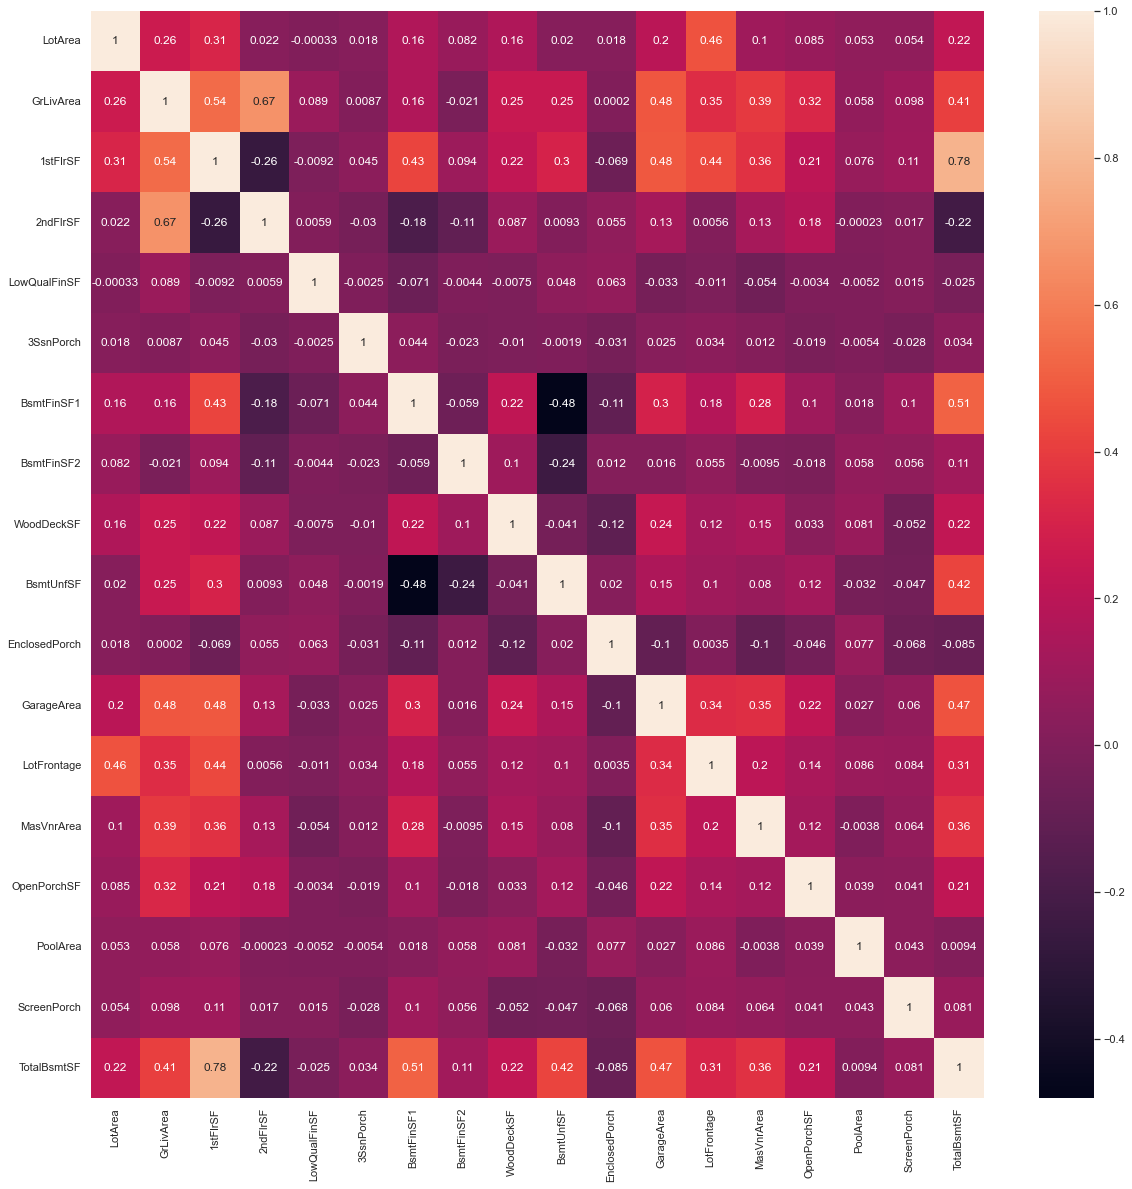

In [36]:
corrMatrix = Area.corr()
plt.figure(figsize=(20,20)) 
sns.heatmap(corrMatrix, annot=True)
plt.show()

### How do Area variables correlate with Price? Any interesting relationships? ###

In [37]:
AreaPrice = pd.concat([Area,Target], axis=1)
AreaPrice.head(3)

LotArea  GrLivArea  1stFlrSF  2ndFlrSF  LowQualFinSF  3SsnPorch  \
0        7890        856       856         0             0          0   
1716     5330        708       708         0             0          0   
1717     7750       1430       774       656             0          0   

      BsmtFinSF1  BsmtFinSF2  WoodDeckSF  BsmtUnfSF  EnclosedPorch  \
0          238.0         0.0           0      618.0              0   
1716       280.0         0.0         164      140.0              0   
1717         0.0         0.0           0      384.0              0   

      GarageArea  LotFrontage  MasVnrArea  OpenPorchSF  PoolArea  ScreenPorch  \
0          399.0          NaN         0.0            0         0          166   
1716         0.0         50.0         0.0            0         0            0   
1717       400.0         62.0         0.0            0         0            0   

      TotalBsmtSF  SalePrice  
0           856.0     126000  
1716        420.0      82500  
1717        384.0     156000

In [38]:
len(AreaPrice.columns)

19

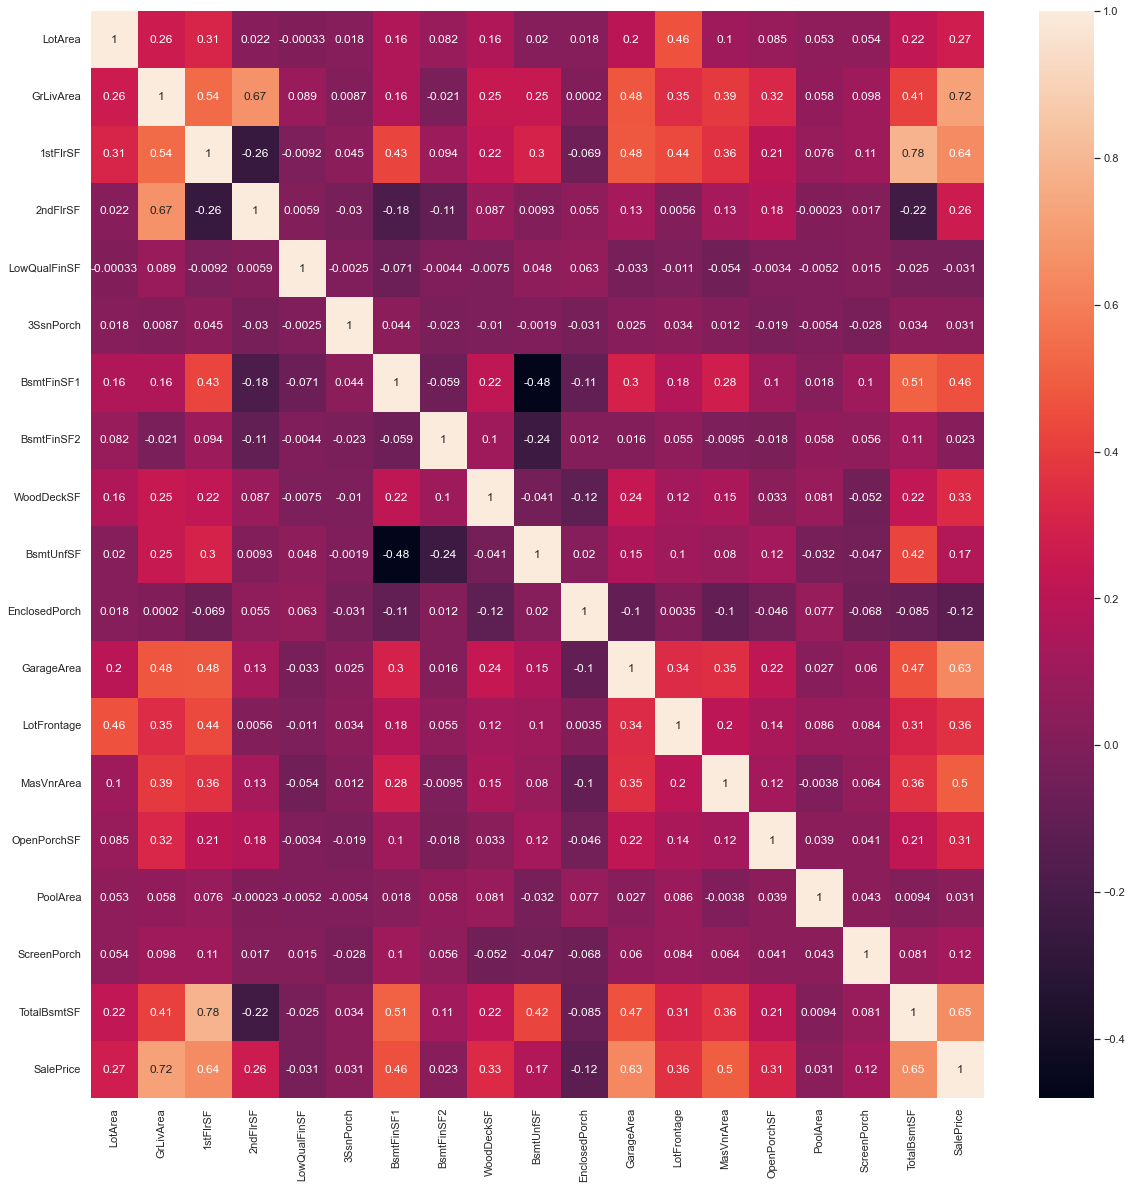

In [39]:
corrMatrix = AreaPrice.corr()
plt.figure(figsize=(20,20)) 
sns.heatmap(corrMatrix, annot=True)
plt.show()

## GrLivArea = 1stFlrSF + 2ndFlrSF + LowQualFinSF ##

In [40]:
Area = Area.assign(Check = Area['GrLivArea'] - Area['1stFlrSF'] - Area['2ndFlrSF'] - Area['LowQualFinSF'])
Area.head(3)

LotArea  GrLivArea  1stFlrSF  2ndFlrSF  LowQualFinSF  3SsnPorch  \
0        7890        856       856         0             0          0   
1716     5330        708       708         0             0          0   
1717     7750       1430       774       656             0          0   

      BsmtFinSF1  BsmtFinSF2  WoodDeckSF  BsmtUnfSF  EnclosedPorch  \
0          238.0         0.0           0      618.0              0   
1716       280.0         0.0         164      140.0              0   
1717         0.0         0.0           0      384.0              0   

      GarageArea  LotFrontage  MasVnrArea  OpenPorchSF  PoolArea  ScreenPorch  \
0          399.0          NaN         0.0            0         0          166   
1716         0.0         50.0         0.0            0         0            0   
1717       400.0         62.0         0.0            0         0            0   

      TotalBsmtSF  Check  
0           856.0      0  
1716        420.0      0  
1717        384.0      0

In [41]:
len(Area.columns)

19

In [42]:
Area['Check'].sum()

0

In [43]:
#Which one has highest R2? 
G = Area[['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']]
G.head(3)

GrLivArea  1stFlrSF  2ndFlrSF  LowQualFinSF
0           856       856         0             0
1716        708       708         0             0
1717       1430       774       656             0

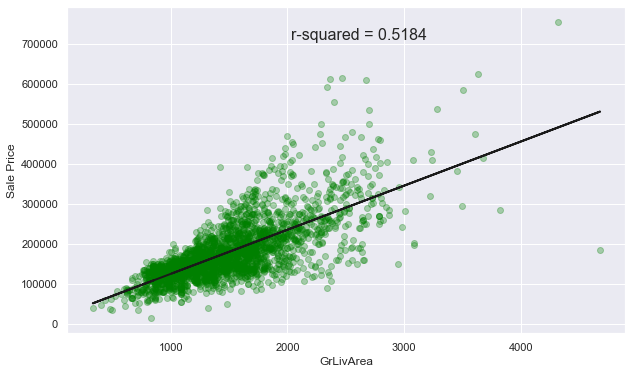

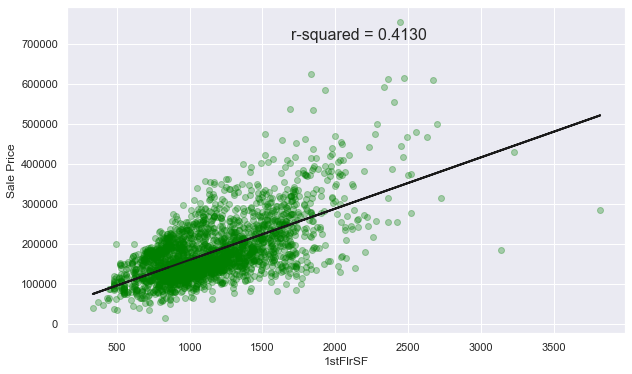

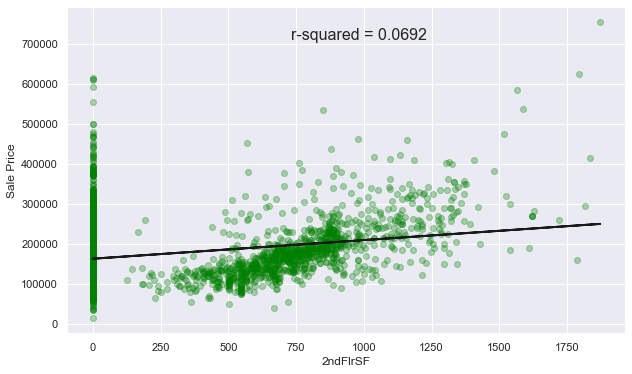

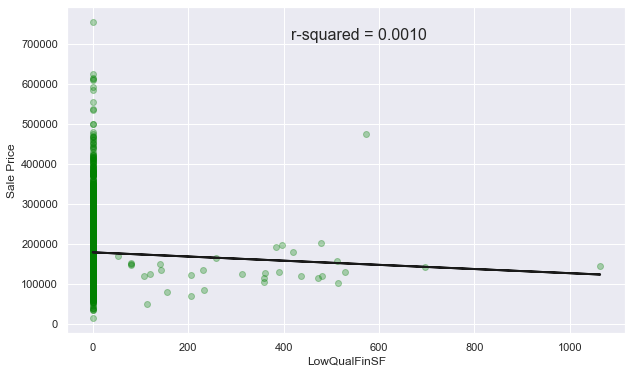

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

column_name = []
R2 = []

for column in G:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = G[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))
    
    #print(column, regressor.score(x,y))    

### Which homes have such large low quality finished square footage? ###

In [45]:
#This will be good to revert back to later.....they could explain some irregularities. 
AreaPrice[Area['LowQualFinSF'] > 400]

LotArea  GrLivArea  1stFlrSF  2ndFlrSF  LowQualFinSF  3SsnPorch  \
2513    18030       3086      1636       971           479          0   
2447     8400       2192      1052       720           420          0   
2493     6876       1969      1272         0           697          0   
2004    22950       3608      1518      1518           572          0   
2115     6204       2230       954       795           481          0   
2159    10480       1639      1166         0           473          0   
170     10410       2377      1313         0          1064          0   
339     12358       1382       854         0           528          0   
219      6000       1522      1008         0           514          0   
903     12099       1728      1216         0           512          0   
766      5400       1480      1044         0           436          0   

      BsmtFinSF1  BsmtFinSF2  WoodDeckSF  BsmtUnfSF  EnclosedPorch  \
2513       152.0       469.0         122      977.0              0   
2447       378.0         0.0         262      342.0              0   
2493         0.0         0.0           0     1272.0              0   
2004         0.0         0.0           0     1107.0              0   
2115         0.0         0.0           0      795.0              0   
2159         0.0         0.0           0     1064.0              0   
170          0.0         0.0           0     1313.0            432   
339        360.0         0.0         237      360.0              0   
219          0.0         0.0           0     1008.0            138   
903        198.0         0.0         200     1018.0              0   
766          0.0         0.0           0      972.0            176   

      GarageArea  LotFrontage  MasVnrArea  OpenPorchSF  PoolArea  ScreenPorch  \
2513         0.0        138.0         0.0            0         0            0   
2447       240.0         60.0         0.0           24         0            0   
2493       400.0         60.0         0.0           34         0            0   
2004       840.0         90.0         0.0          260         0          410   
2115       440.0         60.0         0.0          188         0            0   
2159       240.0         51.0         0.0            0         0            0   
170        528.0         60.0         0.0            0         0            0   
339        660.0          NaN         0.0            0         0            0   
219          0.0         60.0         0.0            0         0            0   
903        371.0          NaN         0.0            0         0            0   
766        207.0         60.0         0.0            0         0            0   

      TotalBsmtSF  SalePrice  
2513       1598.0     200500  
2447        720.0     179500  
2493       1272.0     141000  
2004       1107.0     475000  
2115        795.0     118500  
2159       1064.0     115000  
170        1313.0     142900  
339         720.0     128500  
219        1008.0     102000  
903        1216.0     156000  
766         972.0     119000

### Drop 1stFlrSF, 2ndFlrSF, LowQualFinSF, Check because they equal GrLivArea  for SLR purpose  ###

In [46]:
#GrLivArea has the highest R2, so we drop the other 3 Area variables for SLR purposes: 
Area = Area.drop(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'Check'], axis=1)
Area.head(3)

LotArea  GrLivArea  3SsnPorch  BsmtFinSF1  BsmtFinSF2  WoodDeckSF  \
0        7890        856          0       238.0         0.0           0   
1716     5330        708          0       280.0         0.0         164   
1717     7750       1430          0         0.0         0.0           0   

      BsmtUnfSF  EnclosedPorch  GarageArea  LotFrontage  MasVnrArea  \
0         618.0              0       399.0          NaN         0.0   
1716      140.0              0         0.0         50.0         0.0   
1717      384.0              0       400.0         62.0         0.0   

      OpenPorchSF  PoolArea  ScreenPorch  TotalBsmtSF  
0               0         0          166        856.0  
1716            0         0            0        420.0  
1717            0         0            0        384.0

In [47]:
len(Area.columns)

15

## TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF ##

In [48]:
B = Area[['TotalBsmtSF','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']]
B = B.assign(Check = B['TotalBsmtSF'] - B['BsmtFinSF1'] - B['BsmtFinSF2'] - B['BsmtUnfSF'])
B

TotalBsmtSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  Check
0           856.0       238.0         0.0      618.0    0.0
1716        420.0       280.0         0.0      140.0    0.0
1717        384.0         0.0         0.0      384.0    0.0
1718        828.0         0.0         0.0      828.0    0.0
1719        804.0       556.0         0.0      248.0    0.0
...           ...         ...         ...        ...    ...
582        1302.0       550.0         0.0      752.0    0.0
589           0.0         0.0         0.0        0.0    0.0
433         859.0       548.0         0.0      311.0    0.0
50         1296.0       371.0         0.0      925.0    0.0
551         976.0       976.0         0.0        0.0    0.0

[2580 rows x 5 columns]

In [49]:
B['Check'].sum()

0.0

In [50]:
B_Price = pd.concat([B, Target], axis=1)
B_Price.head(3)

TotalBsmtSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  Check  SalePrice
0           856.0       238.0         0.0      618.0    0.0     126000
1716        420.0       280.0         0.0      140.0    0.0      82500
1717        384.0         0.0         0.0      384.0    0.0     156000

### Dealing with NaN's ###

#### There is one NaN observation for all Basement related features: ####

In [51]:
B_Price.isnull().sum()

TotalBsmtSF    1
BsmtFinSF1     1
BsmtFinSF2     1
BsmtUnfSF      1
Check          1
SalePrice      0
dtype: int64

#### Option 1: Drop It (Base Case) - TotalBsmtSF vs SalePrice has R2 of 42.54% ####

In [52]:
B_Price_nonull = B_Price.dropna()
B_Price_nonull

TotalBsmtSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  Check  SalePrice
0           856.0       238.0         0.0      618.0    0.0     126000
1716        420.0       280.0         0.0      140.0    0.0      82500
1717        384.0         0.0         0.0      384.0    0.0     156000
1718        828.0         0.0         0.0      828.0    0.0     118000
1719        804.0       556.0         0.0      248.0    0.0     155000
...           ...         ...         ...        ...    ...        ...
582        1302.0       550.0         0.0      752.0    0.0     154204
589           0.0         0.0         0.0        0.0    0.0     142953
433         859.0       548.0         0.0      311.0    0.0     150909
50         1296.0       371.0         0.0      925.0    0.0     150000
551         976.0       976.0         0.0        0.0    0.0     127500

[2579 rows x 6 columns]

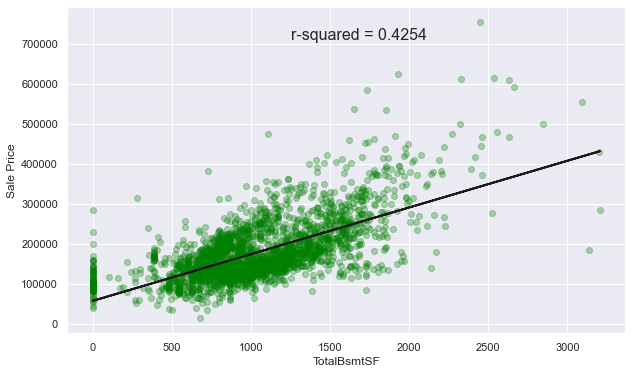

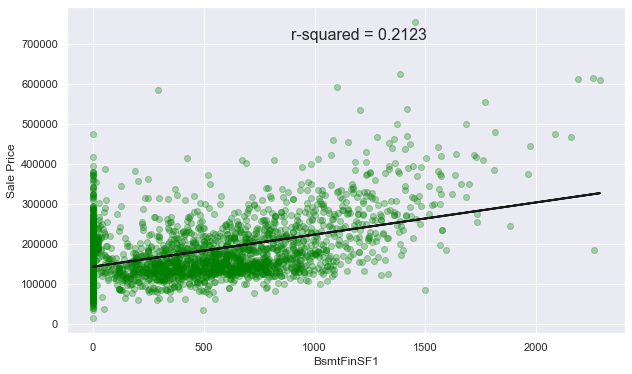

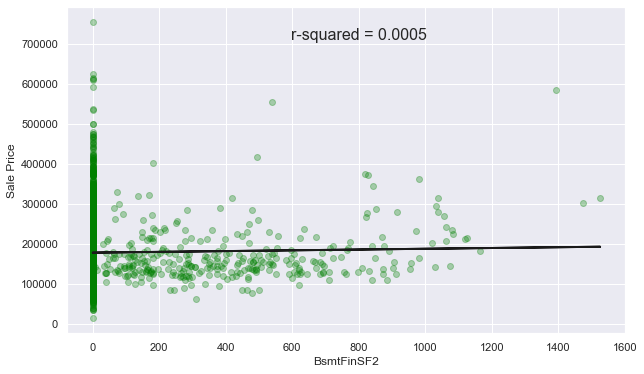

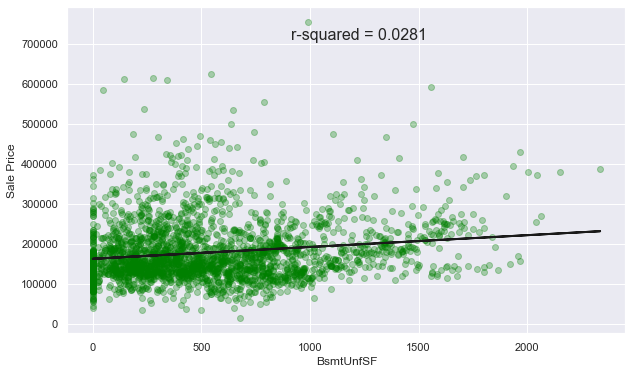

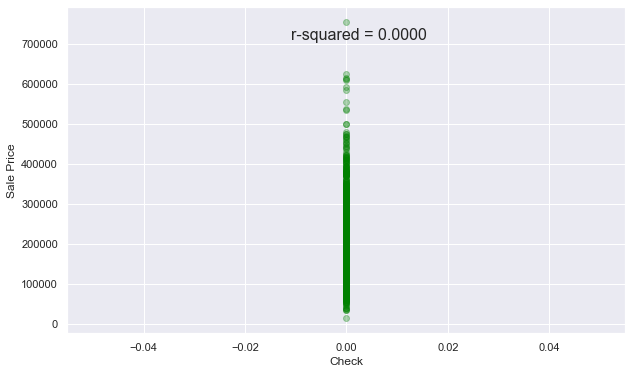

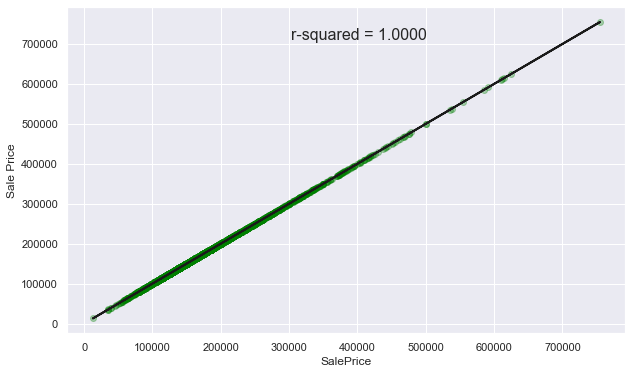

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

column_name = []
R2 = []

for column in B_Price_nonull:

    regressor = LinearRegression()

    y = B_Price_nonull['SalePrice'].values.reshape(-1,1)
    x = B_Price_nonull[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

#### Option 2: Impute It with "1stFlrSF" (has 0.78 corr with TotalBsmtSF) - TotalBsmtSF vs SalePrice has R2 of 42.54%, Same ####


In [54]:
B_Price = pd.concat([B, Target], axis=1)
B_Price.shape

(2580, 6)

In [55]:
B_Price[B_Price.isna().any(axis=1)]

TotalBsmtSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  Check  SalePrice
912          NaN         NaN         NaN        NaN    NaN      79000

In [56]:
#Impute with 896 which is size of 1stFlrSF:
B_Price['TotalBsmtSF'] = B_Price['TotalBsmtSF'].replace(np.nan, 896)

In [57]:
#Check Result: 
B_Price[B_Price.isna().any(axis=1)]

TotalBsmtSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  Check  SalePrice
912        896.0         NaN         NaN        NaN    NaN      79000

In [58]:
B_Price.isnull().sum()

TotalBsmtSF    0
BsmtFinSF1     1
BsmtFinSF2     1
BsmtUnfSF      1
Check          1
SalePrice      0
dtype: int64

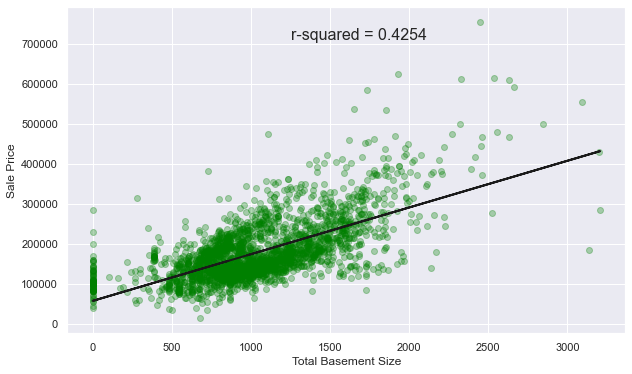

In [59]:
regressor = LinearRegression()

y = B_Price_nonull['SalePrice'].values.reshape(-1,1)
x = B_Price_nonull['TotalBsmtSF'].values.reshape(-1,1)
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.3)
plt.xlabel('Total Basement Size')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
plt.show();

#### Option 3: Impute it with "0" - TotalBsmtSF vs SalePrice has R2 of 42.54%, Same again ####

In [60]:
B_Price = pd.concat([B, Target], axis=1)
B_Price.shape

(2580, 6)

In [61]:
B_Price[B_Price.isna().any(axis=1)]

TotalBsmtSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  Check  SalePrice
912          NaN         NaN         NaN        NaN    NaN      79000

In [62]:
#Impute with 0:
B_Price['TotalBsmtSF'] = B_Price['TotalBsmtSF'].replace(np.nan, 0)

In [63]:
#Check Result: 
B_Price[B_Price.isna().any(axis=1)]

TotalBsmtSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  Check  SalePrice
912          0.0         NaN         NaN        NaN    NaN      79000

In [64]:
B_Price.isnull().sum()

TotalBsmtSF    0
BsmtFinSF1     1
BsmtFinSF2     1
BsmtUnfSF      1
Check          1
SalePrice      0
dtype: int64

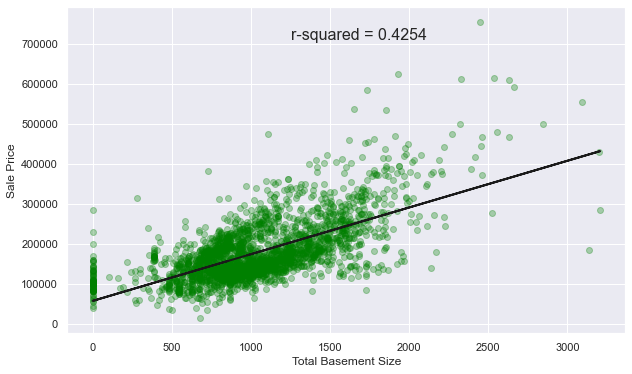

In [65]:
regressor = LinearRegression()

y = B_Price_nonull['SalePrice'].values.reshape(-1,1)
x = B_Price_nonull['TotalBsmtSF'].values.reshape(-1,1)
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.3)
plt.xlabel('Total Basement Size')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
plt.show();

### Drop BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, Check because they equal TotalBsmtSF for SLR purpose  ###

In [66]:
Area = Area.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1)
Area.head(3)

LotArea  GrLivArea  3SsnPorch  WoodDeckSF  EnclosedPorch  GarageArea  \
0        7890        856          0           0              0       399.0   
1716     5330        708          0         164              0         0.0   
1717     7750       1430          0           0              0       400.0   

      LotFrontage  MasVnrArea  OpenPorchSF  PoolArea  ScreenPorch  TotalBsmtSF  
0             NaN         0.0            0         0          166        856.0  
1716         50.0         0.0            0         0            0        420.0  
1717         62.0         0.0            0         0            0        384.0

In [67]:
len(Area.columns)

12

In [68]:
#Impute with 896 for the one missing TotalBsmtSF which is size of 1stFlrSF:
Area['TotalBsmtSF'] = Area['TotalBsmtSF'].replace(np.nan, 896)

In [69]:
Area.isnull().sum()

LotArea            0
GrLivArea          0
3SsnPorch          0
WoodDeckSF         0
EnclosedPorch      0
GarageArea         1
LotFrontage      462
MasVnrArea        14
OpenPorchSF        0
PoolArea           0
ScreenPorch        0
TotalBsmtSF        0
dtype: int64

In [70]:
GB = Area[['GrLivArea', 'TotalBsmtSF']]
GB.isnull().sum()

GrLivArea      0
TotalBsmtSF    0
dtype: int64

In [71]:
GB.shape

(2580, 2)

In [72]:
GB = GB.assign(GB = GB['GrLivArea'] + GB['TotalBsmtSF'])
GB.head(3)

GrLivArea  TotalBsmtSF      GB
0           856        856.0  1712.0
1716        708        420.0  1128.0
1717       1430        384.0  1814.0

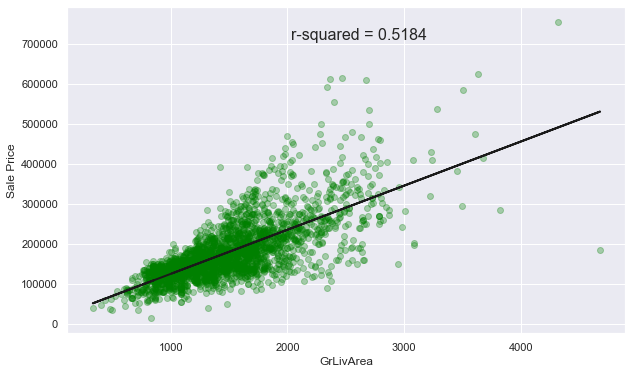

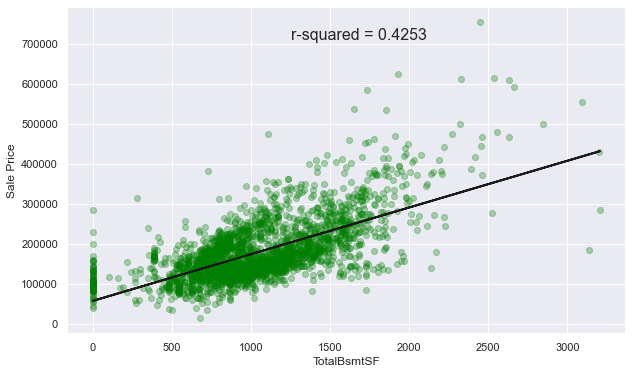

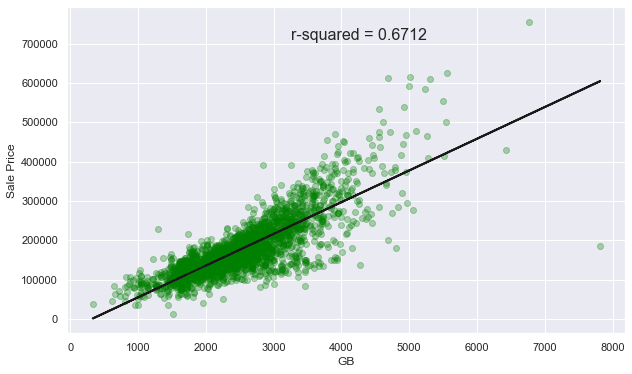

In [73]:
column_name = []
R2 = []

for column in GB:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = GB[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [74]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

Feature  R-Squared
2           GB   0.671156
0    GrLivArea   0.518373
1  TotalBsmtSF   0.425312

## Garage ##

In [75]:
Gar = Area[['GarageArea']]
Gar.head(3)

GarageArea
0          399.0
1716         0.0
1717       400.0

In [76]:
Gar_missing = PID[Gar.isnull().any(axis=1)]
Gar_missing

Unnamed: 0   MapRefNo  Top
433         434  910201180  5.0

In [77]:
Address = pd.read_csv('Ames Real Estate Data.csv', index_col=0, dtype='unicode')
Address.shape

(22213, 90)

In [78]:
pd.merge(Gar_missing, Address, on='MapRefNo')

Unnamed: 0   MapRefNo  Top    GeoRefNo Tier Range          Prop_Addr  \
0         434  910201180  5.0  0910201180    0     0  114 S RUSSELL AVE   

  ZngCdPr ZngCdSc ZngOLPr ZngOLSc    ClassPr_S             ClassSc_S  \
0    UCRM     NaN     NaN     NaN  RESIDENTIAL  2-STORY 1945 & OLDER   

                                  Legal_Pr SchD_S TxD_S  \
0  LINCOLN PLACE ADD BLOCK:2 LOT:8 \n AMES      1    01   

                               MA_Ownr1 MA_Ownr2           MA_Line1 MA_Line2  \
0  DIMOND, JAMES DAVID & MELISSA LOUISE      NaN  114 S RUSSELL AVE      NaN   

  MA_City MA_State MA_Zip1 MA_Zip2 Rcrd_Yr Rcrd_Mo   Inst1_No Inst1_Yr  \
0    AMES       IA   50010    5970    2007       3  200703065     2007   

  Inst1_Mo Inst1TPr LndAc_S ImpAc_S OthAc_S TtlVal_AsrYr ValType X1TPr_D  \
0        3      WRD   46100       0  138100       184200       F     NaN   

  X1TSc_D X2TPr_D X2TSc_D X1TPr_S X1TSc_S X2TPr_S X2TSc_S LndAcX1S ImpAcX1S  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN        0        0   

  ImpAcX2S HSTtl_D MilVal_D HSTtl_S MilVal_S AcreX_S1 AcreGr AcreNt_S  \
0        0    4850        0    4850        0        0      0        0   

  Neighborhood LotArea  ParType BldgNo_S DwlgNo_S BldgType YrBuilt HouseStyle  \
0      IDOT&RR    9060  Dwg&Lot        0        1  1FamDet    1923    2-Story   

  Foundation RoofMatl     Ext1     Ext2 MasVnrType Heating Central Air   GLA  \
0    Brk/Til  CompShg  Wd Sdng  Plywood       None  GasFWA         Yes  1828   

  TtlBsmtSF TotRmsAbvGrd Fireplaces PoolArea GarageType GarYrBlt Cars  \
0       859            6          0        0    No Data        0    0   

  GarageArea YrSold_YYYY MoSold_MM SalePrice SaleType SaleCond ParclRel  \
0          0         NaN       NaN       NaN      NaN      NaN     Deed   

  PA-Nmbr PA-PreD  PA-Strt PA-StSfx PA-PostD PA-UnTyp PA-UntNo       Date  \
0     114       S  RUSSELL      AVE      NaN      NaN      NaN  10-Jul-20   

               Source NmbrBRs  
0  Ames City Assessor       3

In [79]:
df[Gar.isnull().any(axis=1)]

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
433         434  910201180       1828     150909          70       RM   

     LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
433         50.0     9060   Pave   NaN      Reg         Lvl    AllPub   

    LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
433    Inside       Gtl       IDOTRR       Norm       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
433     2Story            5            6       1923          1999     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
433  CompShg     Wd Sdng     Plywood       None         0.0        TA   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
433        TA     BrkTil       Gd       TA           No          ALQ   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
433       548.0          Unf         0.0      311.0        859.0    GasA   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
433        Ex          Y      SBrkr       942       886             0   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
433           0.0           0.0         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
433             1          Gd             6        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
433         NaN     Detchd          NaN          NaN         NaN         NaN   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
433        NaN        NaN          Y         174            0            212   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
433          0            0         0    NaN  MnPrv         NaN        0   

     MoSold  YrSold SaleType SaleCondition  Top  
433       3    2007      WD         Alloca  5.0

In [80]:
#Conclusion - No Garage:
#a) GarageFinish, GarageQual, GarageCond @ NaN = No Garage (as per data description)
#b) Website of home (Trulia, Realtor) do not have any "Parking Info"

#### Option 1: Impute GarageArea with 0 ####

In [81]:
Area['GarageArea'] = Area['GarageArea'].replace(np.nan, 0)
Area.isnull().sum()

LotArea            0
GrLivArea          0
3SsnPorch          0
WoodDeckSF         0
EnclosedPorch      0
GarageArea         0
LotFrontage      462
MasVnrArea        14
OpenPorchSF        0
PoolArea           0
ScreenPorch        0
TotalBsmtSF        0
dtype: int64

In [82]:
Area.shape

(2580, 12)

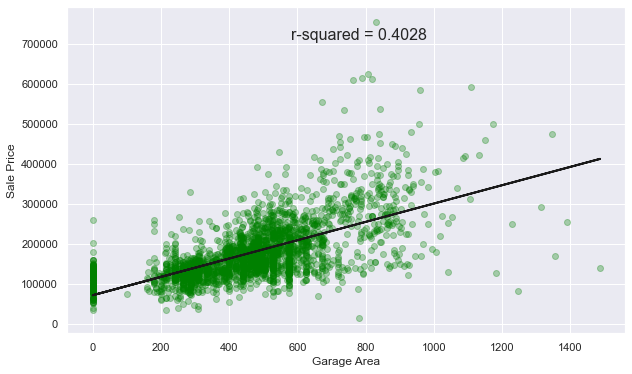

In [83]:
regressor = LinearRegression()

y = Target['SalePrice'].values.reshape(-1,1)
x = Area['GarageArea'].values.reshape(-1,1)
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.3)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
plt.show();

In [84]:
GBG = Area[['GrLivArea', 'TotalBsmtSF', 'GarageArea']]
GBG.shape

(2580, 3)

In [85]:
GBG.head()

GrLivArea  TotalBsmtSF  GarageArea
0           856        856.0       399.0
1716        708        420.0         0.0
1717       1430        384.0       400.0
1718       1594        828.0         0.0
1719       1548        804.0       440.0

In [86]:
GBG.isnull().sum()

GrLivArea      0
TotalBsmtSF    0
GarageArea     0
dtype: int64

In [87]:
GBG = GBG.assign(GBG = GBG['GrLivArea'] + GBG['TotalBsmtSF'] + GBG['GarageArea'])
GBG.head(3)

GrLivArea  TotalBsmtSF  GarageArea     GBG
0           856        856.0       399.0  2111.0
1716        708        420.0         0.0  1128.0
1717       1430        384.0       400.0  2214.0

In [88]:
Target[['SalePrice']].head(3)

SalePrice
0        126000
1716      82500
1717     156000

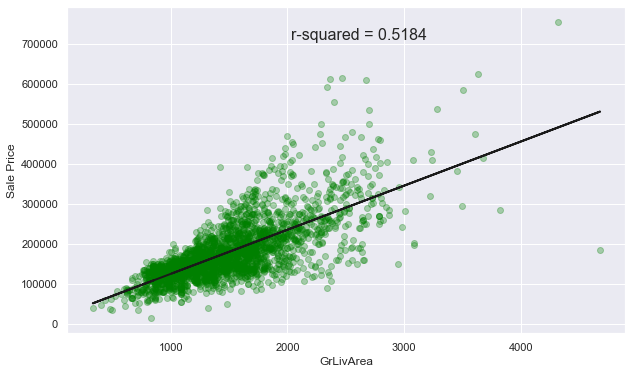

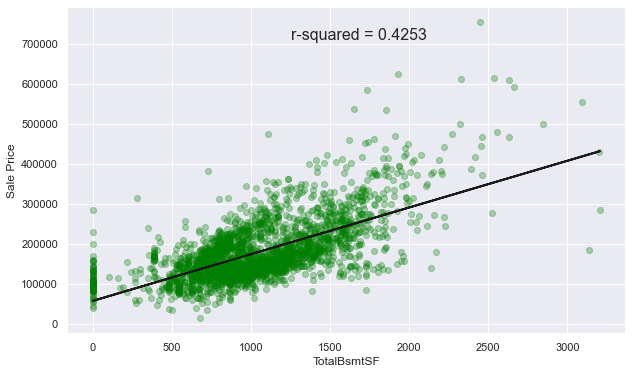

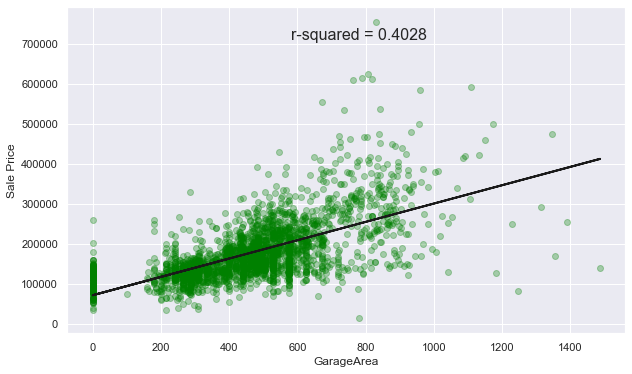

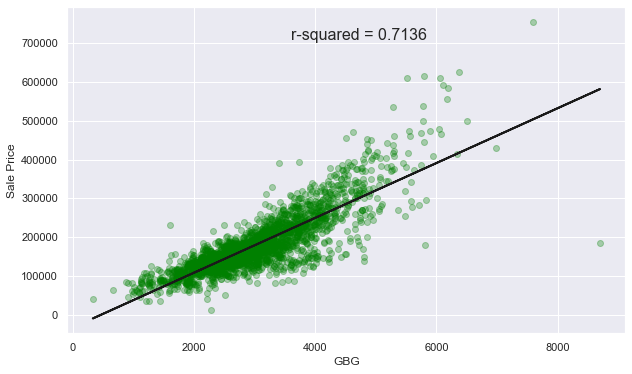

In [89]:
column_name = []
R2 = []

for column in GBG:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = GBG[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [90]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

Feature  R-Squared
3          GBG   0.713555
0    GrLivArea   0.518373
1  TotalBsmtSF   0.425312
2   GarageArea   0.402804

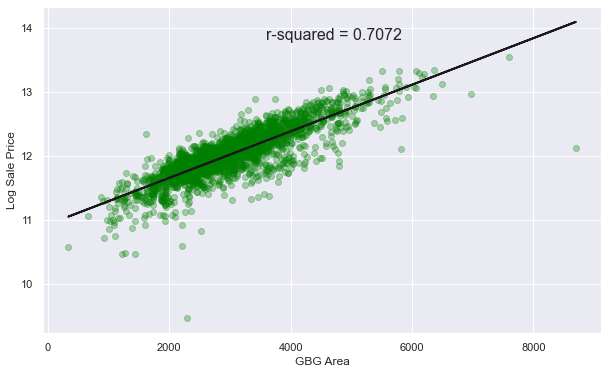

In [91]:
regressor = LinearRegression()

y = np.log(Target['SalePrice'].values.reshape(-1,1))
x = GBG['GBG'].values.reshape(-1,1)
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.3)
plt.xlabel('GBG Area')
plt.ylabel('Log Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
plt.show();

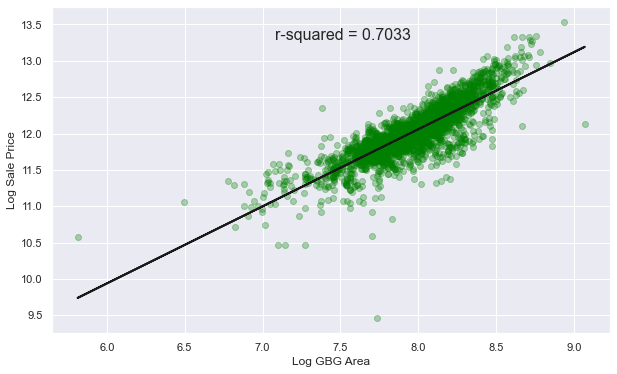

In [92]:
regressor = LinearRegression()

y = np.log(Target['SalePrice'].values.reshape(-1,1))
x = np.log(GBG['GBG'].values.reshape(-1,1))
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.3)
plt.xlabel('Log GBG Area')
plt.ylabel('Log Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
plt.show();

## MasVnrArea & MasVnrType ##

#### There are 14 obs with NaN for MasVnrArea & MasVnrType. We will impute with 0 and None. Many homes do not have any masonry veneer and are clearly labelled 0 and None. We will assume these fall in that category ####

In [93]:
df[['MasVnrType','MasVnrArea']].isna().sum()

MasVnrType    14
MasVnrArea    14
dtype: int64

In [94]:
df[df['MasVnrArea'].isna()]

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
1355         356  528480160       1665     205950          60       FV   
1553         554  907251090       2031     237000          60       RL   
2536         720  528275160       2004     257500          60       RL   
2477         661  528250010       1394     165500          80       RL   
2033         217  908130020        914     117250          20       RL   
175          176  528439010       1460     247000          20       RL   
1041          42  531371050       1200     184900          20       RL   
1161         162  534104100       1812     205000          60       FV   
787          788  528240070       1960     216500          60       RL   
871          872  907260030       1725     198500          60       RL   
891          892  528290090       1414     176000          60       RL   
358          359  528462040       1428     182000          20       FV   
753          754  533208040       1241     199900         120       FV   
951          952  528429100       1670     336820          20       RL   

      LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
1355         65.0     8125   Pave   NaN      Reg         Lvl    AllPub   
1553         75.0     9473   Pave   NaN      Reg         Lvl    AllPub   
2536          NaN    12891   Pave   NaN      IR1         Lvl    AllPub   
2477          NaN    11950   Pave   NaN      IR1         Lvl    AllPub   
2033         75.0     8050   Pave   NaN      Reg         Lvl    AllPub   
175          87.0    10037   Pave   NaN      Reg         Lvl    AllPub   
1041         67.0    10083   Pave   NaN      Reg         Lvl    AllPub   
1161          NaN     7500   Pave   NaN      Reg         Lvl    AllPub   
787           NaN     7851   Pave   NaN      Reg         Lvl    AllPub   
871          70.0     8749   Pave   NaN      Reg         Lvl    AllPub   
891           NaN     7750   Pave   NaN      Reg         Lvl    AllPub   
358          95.0    11639   Pave   NaN      Reg         Lvl    AllPub   
753          35.0     4274   Pave  Pave      IR1         Lvl    AllPub   
951          49.0    15218   Pave   NaN      IR1         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
1355    Inside       Gtl      Somerst       Norm       Norm     1Fam   
1553    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
2536    Corner       Gtl      Gilbert       Norm       Norm     1Fam   
2477    Corner       Gtl      Gilbert       Norm       Norm     1Fam   
2033    Inside       Gtl      Edwards       Norm       Norm     1Fam   
175     Corner       Gtl      Somerst      Feedr       Norm     1Fam   
1041    Inside       Gtl      SawyerW       Norm       Norm     1Fam   
1161    Inside       Gtl      Somerst       Norm       Norm     1Fam   
787     Inside       Gtl      Gilbert       Norm       Norm     1Fam   
871     Inside       Gtl      CollgCr       Norm       Norm     1Fam   
891     Inside       Gtl      Gilbert       RRAn       Norm     1Fam   
358     Corner       Gtl      Somerst       Norm       Norm     1Fam   
753     Inside       Gtl      Somerst       Norm       Norm   TwnhsE   
951    CulDSac       Gtl      Somerst       RRAn       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
1355     2Story            7            6       2007          2007     Gable   
1553     2Story            8            5       2002          2002     Gable   
2536     2Story            8            5       2002          2002     Gable   
2477       SLvl            7            5       2003          2003     Gable   
2033     1Story            6            5       2002          2002     Gable   
175      1Story            8            5       2006          2007       Hip   
1041     1Story            7            5       2003          2003     Gable   
1161     2Story            7            5       2002          2

In [95]:
df[df['MasVnrArea'] == 0]

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0              1  909176150        856     126000          30       RL   
1716         717  534450150        708      82500          30       RL   
1717         718  528290190       1430     156000          80       RL   
1718         719  902109080       1594     118000         190       RM   
1719         720  527453010       1548     155000         160       RL   
...          ...        ...        ...        ...         ...      ...   
766          767  902405120       1480     119000          50       RM   
54            55  904301060       1200     179000          90       RL   
589          590  906226120       2240     142953          90       RL   
433          434  910201180       1828     150909          70       RM   
50            51  909176170       2592     150000          90       RL   

      LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0             NaN     7890   Pave   NaN      Reg         Lvl    AllPub   
1716         50.0     5330   Pave   NaN      Reg         HLS    AllPub   
1717         62.0     7750   Pave   NaN      Reg         Lvl    AllPub   
1718         63.0    11426   Pave  Grvl      Reg         Lvl    AllPub   
1719         24.0     2308   Pave   NaN      Reg         Lvl    AllPub   
...           ...      ...    ...   ...      ...         ...       ...   
766          60.0     5400   Pave   NaN      Reg         Lvl    AllPub   
54           60.0    10800   Pave   NaN      Reg         Lvl    AllPub   
589          64.0     7018   Pave   NaN      Reg         Lvl    AllPub   
433          50.0     9060   Pave   NaN      Reg         Lvl    AllPub   
50           60.0    10890   Pave   NaN      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Corner       Gtl        SWISU       Norm       Norm     1Fam   
1716    Inside       Gtl      BrkSide       Norm       Norm     1Fam   
1717    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1718    Inside       Gtl      OldTown       Norm       Norm   2fmCon   
1719    Corner       Gtl      NPkVill       Norm       Norm   TwnhsE   
...        ...       ...          ...        ...        ...      ...   
766     Inside       Gtl      OldTown       Norm       Norm     1Fam   
54      Inside       Gtl      Edwards       Norm       Norm   Duplex   
589     Inside       Gtl      SawyerW      Feedr       Norm   Duplex   
433     Inside       Gtl       IDOTRR       Norm       Norm     1Fam   
50      Inside       Gtl        SWISU       Norm       Norm   Duplex   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        1Story            6            6       1939          1950     Gable   
1716     1Story            4            7       1940          1950       Hip   
1717       SLvl            7            5       1999          2000     Gable   
1718     1.5Fin            4            6       1910          1996     Gable   
1719     2Story            6            6       1976          1976     Gable   
...         ...          ...          ...        ...           ...       ...   
766      1.5Fin            6            6       1920          1950     Gable   
54       1Story            5            5       1987          1988     Gable   
589      2Story            5            5       1979          1979     Gable   
433      2Story            5            6       1923          1999     Gable   
50       2Story            5            6       1923          1950       Hip   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     Wd Sdng     Wd Sdng       None         0.0        TA   
1716  CompShg     VinylSd     VinylSd       None         0.0        Fa   
1717  CompShg     VinylSd     VinylSd       None         0.0        TA   
1718  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA   
1719  CompShg     Plywood     Br

In [96]:
df[df['MasVnrType'] == 'None']

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0              1  909176150        856     126000          30       RL   
1716         717  534450150        708      82500          30       RL   
1717         718  528290190       1430     156000          80       RL   
1718         719  902109080       1594     118000         190       RM   
1719         720  527453010       1548     155000         160       RL   
...          ...        ...        ...        ...         ...      ...   
766          767  902405120       1480     119000          50       RM   
54            55  904301060       1200     179000          90       RL   
589          590  906226120       2240     142953          90       RL   
433          434  910201180       1828     150909          70       RM   
50            51  909176170       2592     150000          90       RL   

      LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0             NaN     7890   Pave   NaN      Reg         Lvl    AllPub   
1716         50.0     5330   Pave   NaN      Reg         HLS    AllPub   
1717         62.0     7750   Pave   NaN      Reg         Lvl    AllPub   
1718         63.0    11426   Pave  Grvl      Reg         Lvl    AllPub   
1719         24.0     2308   Pave   NaN      Reg         Lvl    AllPub   
...           ...      ...    ...   ...      ...         ...       ...   
766          60.0     5400   Pave   NaN      Reg         Lvl    AllPub   
54           60.0    10800   Pave   NaN      Reg         Lvl    AllPub   
589          64.0     7018   Pave   NaN      Reg         Lvl    AllPub   
433          50.0     9060   Pave   NaN      Reg         Lvl    AllPub   
50           60.0    10890   Pave   NaN      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Corner       Gtl        SWISU       Norm       Norm     1Fam   
1716    Inside       Gtl      BrkSide       Norm       Norm     1Fam   
1717    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1718    Inside       Gtl      OldTown       Norm       Norm   2fmCon   
1719    Corner       Gtl      NPkVill       Norm       Norm   TwnhsE   
...        ...       ...          ...        ...        ...      ...   
766     Inside       Gtl      OldTown       Norm       Norm     1Fam   
54      Inside       Gtl      Edwards       Norm       Norm   Duplex   
589     Inside       Gtl      SawyerW      Feedr       Norm   Duplex   
433     Inside       Gtl       IDOTRR       Norm       Norm     1Fam   
50      Inside       Gtl        SWISU       Norm       Norm   Duplex   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        1Story            6            6       1939          1950     Gable   
1716     1Story            4            7       1940          1950       Hip   
1717       SLvl            7            5       1999          2000     Gable   
1718     1.5Fin            4            6       1910          1996     Gable   
1719     2Story            6            6       1976          1976     Gable   
...         ...          ...          ...        ...           ...       ...   
766      1.5Fin            6            6       1920          1950     Gable   
54       1Story            5            5       1987          1988     Gable   
589      2Story            5            5       1979          1979     Gable   
433      2Story            5            6       1923          1999     Gable   
50       2Story            5            6       1923          1950       Hip   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     Wd Sdng     Wd Sdng       None         0.0        TA   
1716  CompShg     VinylSd     VinylSd       None         0.0        Fa   
1717  CompShg     VinylSd     VinylSd       None         0.0        TA   
1718  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA   
1719  CompShg     Plywood     Br

In [97]:
df[(df['MasVnrType'] == 'None') & (df['MasVnrArea'] != 0)]

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
1993         177  527166010       1983     225000          60       RL   
2100         284  902427140        968     104500          20       RM   
2106         290  533352075       2620     190000          90       RL   
603          604  528138010       1808     324000          20       RL   
114          115  534129230       1790     165150          60       RL   
1230         231  527451110       1365     125000         160       RM   
1137         138  535106140        912     114500          20       RL   

      LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
1993          NaN    10762   Pave   NaN      IR1         Lvl    AllPub   
2100         52.0     8626   Pave   NaN      Reg         Lvl    AllPub   
2106          NaN    18890   Pave   NaN      IR1         Lvl    AllPub   
603         102.0    13514   Pave   NaN      IR1         Lvl    AllPub   
114          80.0    10400   Pave   NaN      Reg         Lvl    AllPub   
1230         24.0     2368   Pave   NaN      Reg         Lvl    AllPub   
1137         70.0    10150   Pave   NaN      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
1993   CulDSac       Gtl      Gilbert       Norm       Norm     1Fam   
2100    Inside       Gtl      OldTown       Norm       Norm     1Fam   
2106    Inside       Gtl       Sawyer      Feedr       RRAe   Duplex   
603     Corner       Gtl      NridgHt       Norm       Norm     1Fam   
114     Inside       Gtl       NWAmes       Norm       Norm     1Fam   
1230    Inside       Gtl       BrDale       Norm       Norm   TwnhsE   
1137    Inside       Gtl        NAmes      Feedr       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
1993     2Story            7            5       1999          1999     Gable   
2100     1Story            4            6       1956          1956     Gable   
2106     1.5Fin            5            5       1977          1977      Shed   
603      1Story            9            5       2008          2008       Hip   
114      2Story            6            5       1972          1972     Gable   
1230     2Story            5            6       1970          1970     Gable   
1137     1Story            5            5       1958          1958     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
1993  CompShg     VinylSd     VinylSd       None       344.0        Gd   
2100  CompShg     MetalSd     MetalSd       None         1.0        TA   
2106  CompShg     Plywood     Plywood       None         1.0        TA   
603   CompShg     VinylSd     VinylSd       None       285.0        Ex   
114   CompShg     VinylSd     VinylSd       None       288.0        TA   
1230  CompShg     HdBoard     HdBoard       None       312.0        TA   
1137  CompShg     Wd Sdng     Wd Sdng       None         1.0        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
1993        TA      PConc       Gd       TA           No          GLQ   
2100        TA     CBlock      NaN      NaN          NaN          NaN   
2106        TA     CBlock       Gd       TA           No          GLQ   
603         TA      PConc       Ex       TA           No          GLQ   
114         TA     CBlock       TA       TA           No          Rec   
1230        TA     CBlock       TA       TA           No          LwQ   
1137        TA     CBlock       TA       TA           No          Rec   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
1993       694.0          Unf         0.0      284.0        978.0    GasA   
2100         0.0          NaN         0.0        0.0          0.0    GasA   
2106       498.0          Rec       211.0      652.0       1361.0    GasA   
603       1142.0          Unf         0.0      632.0       1774.0    GasA   
114        247.0          Unf         0

In [98]:
Area['MasVnrArea'] = Area['MasVnrArea'].replace(np.nan, 0)
Area.isnull().sum()

LotArea            0
GrLivArea          0
3SsnPorch          0
WoodDeckSF         0
EnclosedPorch      0
GarageArea         0
LotFrontage      462
MasVnrArea         0
OpenPorchSF        0
PoolArea           0
ScreenPorch        0
TotalBsmtSF        0
dtype: int64

In [99]:
Area.shape

(2580, 12)

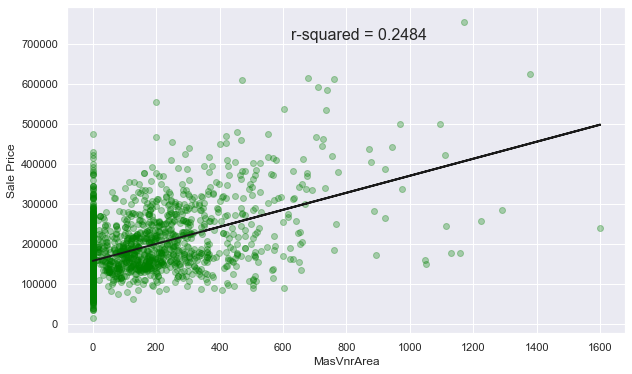

In [100]:
column_name = []
R2 = []

regressor = LinearRegression()

y = Target['SalePrice'].values.reshape(-1,1)
x = Area['MasVnrArea'].values.reshape(-1,1)
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.3)
plt.xlabel('MasVnrArea')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
plt.show()
    
column_name.append(column)
R2.append(regressor.score(x,y))

#### Note that R2 between Sale Price and MasVnrArea is same at 24.84% whether we drop variable or impute with 0. ####

In [101]:
GBGV = Area[['GrLivArea', 'TotalBsmtSF', 'GarageArea','MasVnrArea']]
GBGV.shape

(2580, 4)

In [102]:
GBGV = GBGV.assign(GBGV = GBGV['GrLivArea'] + GBGV['TotalBsmtSF'] + GBGV['GarageArea'] + GBGV['MasVnrArea'])
GBGV.head(3)

GrLivArea  TotalBsmtSF  GarageArea  MasVnrArea    GBGV
0           856        856.0       399.0         0.0  2111.0
1716        708        420.0         0.0         0.0  1128.0
1717       1430        384.0       400.0         0.0  2214.0

In [103]:
GBGV.shape

(2580, 5)

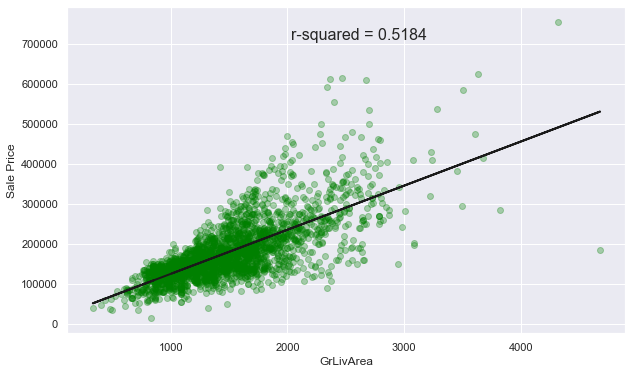

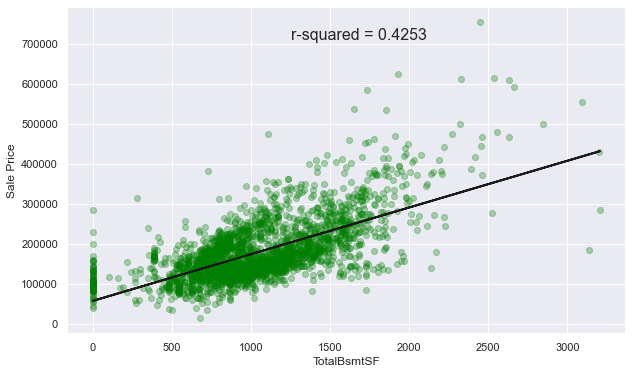

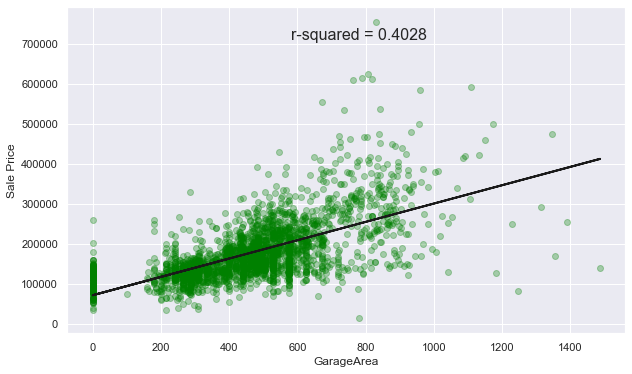

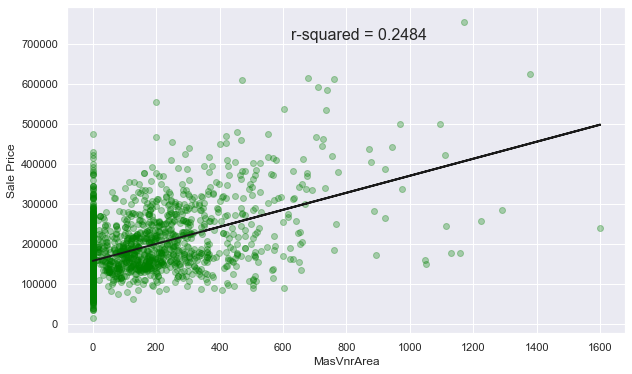

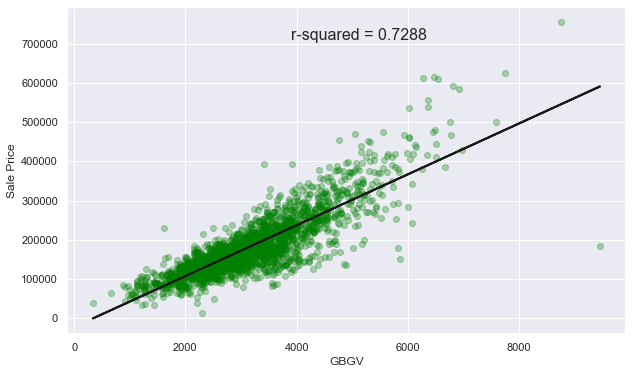

In [104]:
column_name = []
R2 = []

for column in GBGV:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = GBGV[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [105]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

Feature  R-Squared
4         GBGV   0.728825
0    GrLivArea   0.518373
1  TotalBsmtSF   0.425312
2   GarageArea   0.402804
3   MasVnrArea   0.248434

## WoodDeckSF ##

In [106]:
Area

LotArea  GrLivArea  3SsnPorch  WoodDeckSF  EnclosedPorch  GarageArea  \
0        7890        856          0           0              0       399.0   
1716     5330        708          0         164              0         0.0   
1717     7750       1430          0           0              0       400.0   
1718    11426       1594          0           0            109         0.0   
1719     2308       1548          0          48              0       440.0   
...       ...        ...        ...         ...            ...         ...   
582     18160       1128          0           0            246       480.0   
589      7018       2240          0         154              0       528.0   
433      9060       1828          0         174            212         0.0   
50      10890       2592          0           0            240         0.0   
551      7840       1012          0           0              0         0.0   

      LotFrontage  MasVnrArea  OpenPorchSF  PoolArea  ScreenPorch  TotalBsmtSF  
0             NaN         0.0            0         0          166        856.0  
1716         50.0         0.0            0         0            0        420.0  
1717         62.0         0.0            0         0            0        384.0  
1718         63.0         0.0          172         0            0        828.0  
1719         24.0         0.0            0         0            0        804.0  
...           ...         ...          ...       ...          ...          ...  
582         160.0       138.0          108         0            0       1302.0  
589          64.0         0.0            0         0            0          0.0  
433          50.0         0.0            0         0            0        859.0  
50           60.0         0.0          742         0            0       1296.0  
551          38.0       355.0            0         0            0        976.0  

[2580 rows x 12 columns]

In [107]:
Area.isnull().sum()

LotArea            0
GrLivArea          0
3SsnPorch          0
WoodDeckSF         0
EnclosedPorch      0
GarageArea         0
LotFrontage      462
MasVnrArea         0
OpenPorchSF        0
PoolArea           0
ScreenPorch        0
TotalBsmtSF        0
dtype: int64

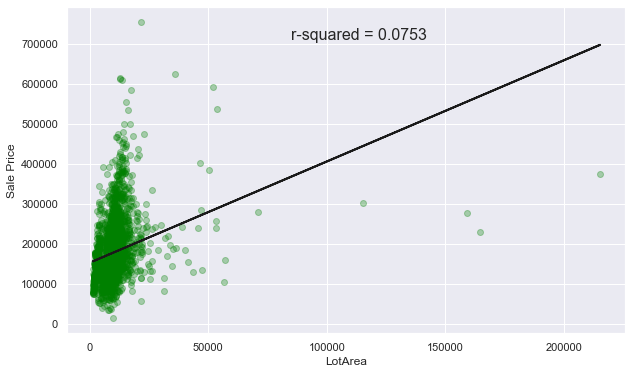

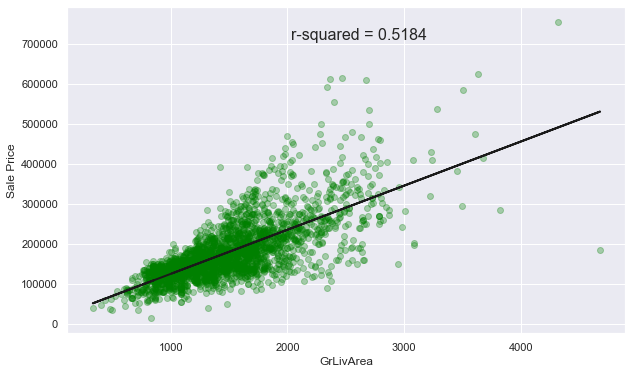

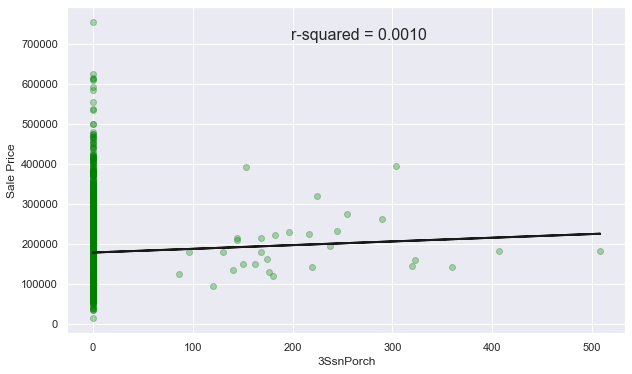

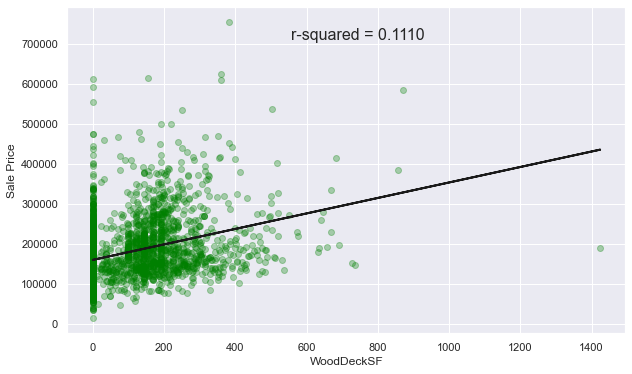

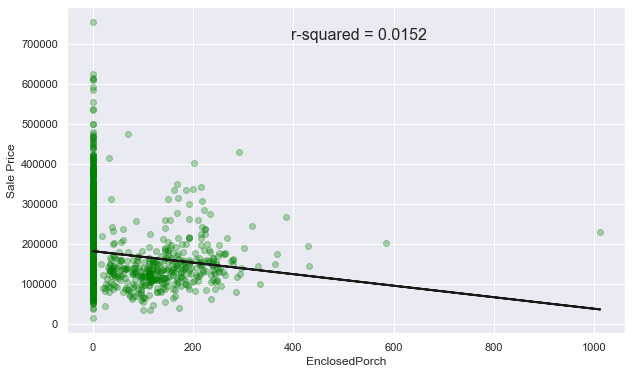

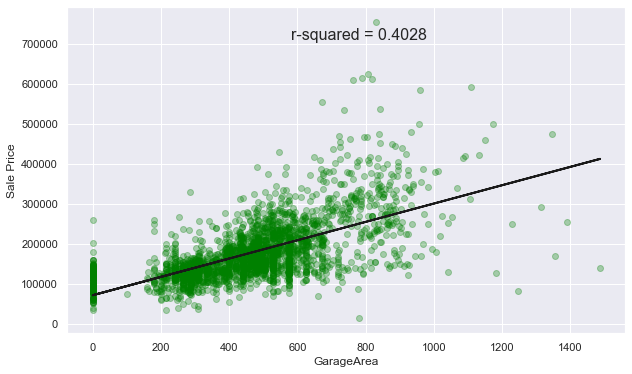

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [108]:
column_name = []
R2 = []

for column in Area:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = Area[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [109]:
Area['WoodDeckSF'].isnull().sum()

0

In [110]:
GBGVW = Area[['GrLivArea', 'TotalBsmtSF', 'GarageArea','MasVnrArea', 'WoodDeckSF']]
GBGVW.shape

(2580, 5)

In [111]:
GBGVW.head(3)

GrLivArea  TotalBsmtSF  GarageArea  MasVnrArea  WoodDeckSF
0           856        856.0       399.0         0.0           0
1716        708        420.0         0.0         0.0         164
1717       1430        384.0       400.0         0.0           0

In [112]:
GBGVW = GBGVW.assign(GBGVW = GBGVW['GrLivArea'] + GBGVW['TotalBsmtSF'] + 
                     GBGVW['GarageArea'] + GBGVW['MasVnrArea'] + GBGVW['WoodDeckSF'])
GBGVW.head(3)

GrLivArea  TotalBsmtSF  GarageArea  MasVnrArea  WoodDeckSF   GBGVW
0           856        856.0       399.0         0.0           0  2111.0
1716        708        420.0         0.0         0.0         164  1292.0
1717       1430        384.0       400.0         0.0           0  2214.0

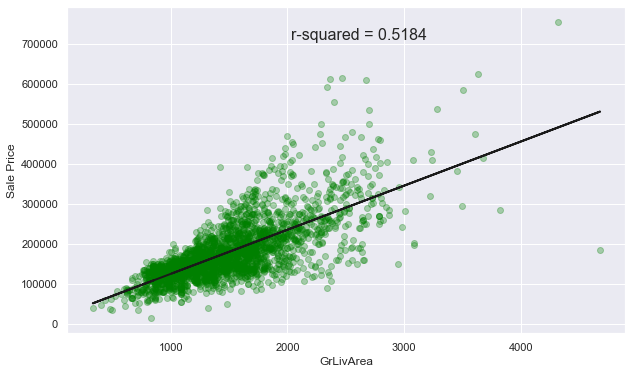

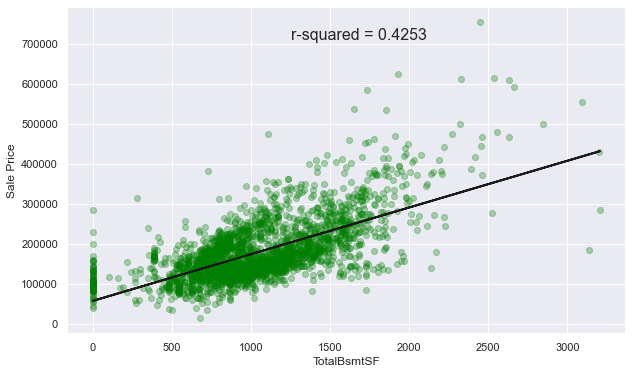

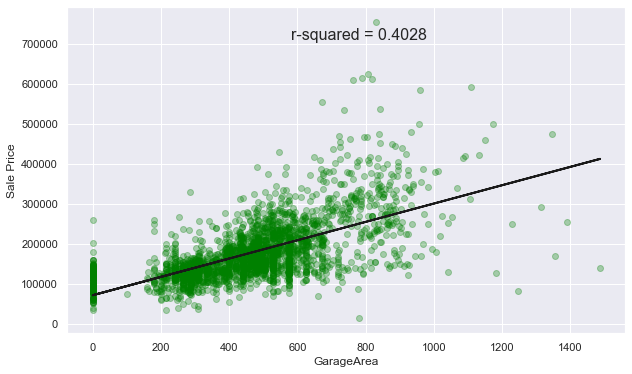

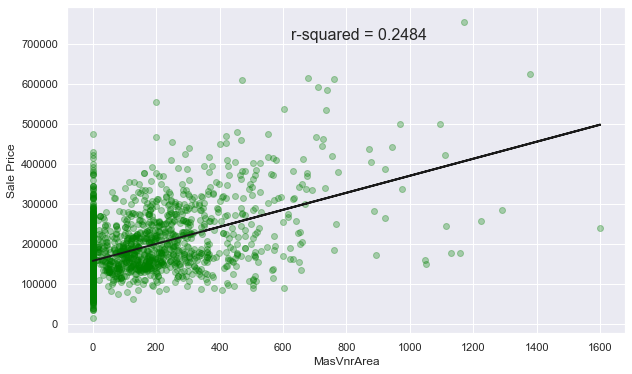

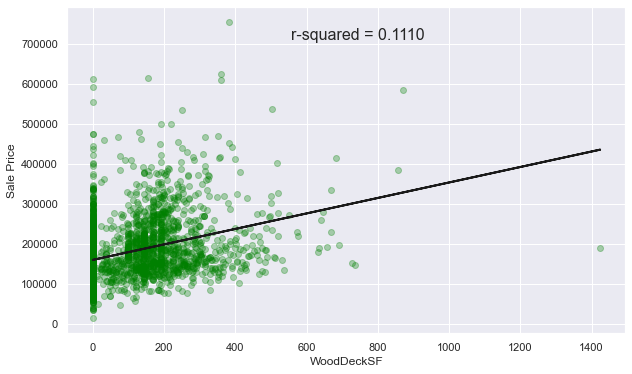

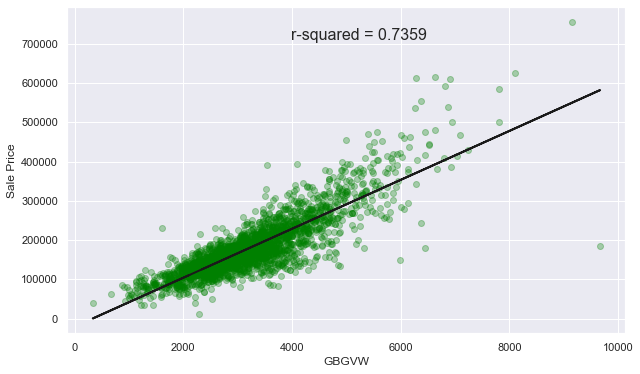

In [113]:
column_name = []
R2 = []

for column in GBGVW:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = GBGVW[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [114]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

Feature  R-Squared
5        GBGVW   0.735922
0    GrLivArea   0.518373
1  TotalBsmtSF   0.425312
2   GarageArea   0.402804
3   MasVnrArea   0.248434
4   WoodDeckSF   0.111043

## LotFrontage ##

In [115]:
# Group lots by configuration
grouped_lots = df.groupby(['LotConfig']).agg({
   'LotFrontage' : 'mean', 
})
grouped_lots

LotFrontage
LotConfig             
Corner       81.468023
CulDSac      56.456790
FR2          59.413793
FR3          79.300000
Inside       66.633846

In [116]:
Area.isnull().sum()

LotArea            0
GrLivArea          0
3SsnPorch          0
WoodDeckSF         0
EnclosedPorch      0
GarageArea         0
LotFrontage      462
MasVnrArea         0
OpenPorchSF        0
PoolArea           0
ScreenPorch        0
TotalBsmtSF        0
dtype: int64

In [117]:
Area.shape

(2580, 12)

In [118]:
LC = df[['LotConfig']]
LC

LotConfig
0       Corner
1716    Inside
1717    Inside
1718    Inside
1719    Corner
...        ...
582     Inside
589     Inside
433     Inside
50      Inside
551    CulDSac

[2580 rows x 1 columns]

In [119]:
LC.isnull().sum()

LotConfig    0
dtype: int64

In [120]:
Area['LC'] = LC
Area

LotArea  GrLivArea  3SsnPorch  WoodDeckSF  EnclosedPorch  GarageArea  \
0        7890        856          0           0              0       399.0   
1716     5330        708          0         164              0         0.0   
1717     7750       1430          0           0              0       400.0   
1718    11426       1594          0           0            109         0.0   
1719     2308       1548          0          48              0       440.0   
...       ...        ...        ...         ...            ...         ...   
582     18160       1128          0           0            246       480.0   
589      7018       2240          0         154              0       528.0   
433      9060       1828          0         174            212         0.0   
50      10890       2592          0           0            240         0.0   
551      7840       1012          0           0              0         0.0   

      LotFrontage  MasVnrArea  OpenPorchSF  PoolArea  ScreenPorch  \
0             NaN         0.0            0         0          166   
1716         50.0         0.0            0         0            0   
1717         62.0         0.0            0         0            0   
1718         63.0         0.0          172         0            0   
1719         24.0         0.0            0         0            0   
...           ...         ...          ...       ...          ...   
582         160.0       138.0          108         0            0   
589          64.0         0.0            0         0            0   
433          50.0         0.0            0         0            0   
50           60.0         0.0          742         0            0   
551          38.0       355.0            0         0            0   

      TotalBsmtSF       LC  
0           856.0   Corner  
1716        420.0   Inside  
1717        384.0   Inside  
1718        828.0   Inside  
1719        804.0   Corner  
...           ...      ...  
582        1302.0   Inside  
589           0.0   Inside  
433         859.0   Inside  
50         1296.0   Inside  
551         976.0  CulDSac  

[2580 rows x 13 columns]

In [121]:
Area.isnull().sum()

LotArea            0
GrLivArea          0
3SsnPorch          0
WoodDeckSF         0
EnclosedPorch      0
GarageArea         0
LotFrontage      462
MasVnrArea         0
OpenPorchSF        0
PoolArea           0
ScreenPorch        0
TotalBsmtSF        0
LC                 0
dtype: int64

In [122]:
Area.groupby('LC')['LotFrontage'].mean()

LC
Corner     81.468023
CulDSac    56.456790
FR2        59.413793
FR3        79.300000
Inside     66.633846
Name: LotFrontage, dtype: float64

In [123]:
Area[Area['LotFrontage'].isna()].groupby('LC').count()

LotArea  GrLivArea  3SsnPorch  WoodDeckSF  EnclosedPorch  GarageArea  \
LC                                                                              
Corner        95         95         95          95             95          95   
CulDSac       83         83         83          83             83          83   
FR2           20         20         20          20             20          20   
FR3            3          3          3           3              3           3   
Inside       261        261        261         261            261         261   

         LotFrontage  MasVnrArea  OpenPorchSF  PoolArea  ScreenPorch  \
LC                                                                     
Corner             0          95           95        95           95   
CulDSac            0          83           83        83           83   
FR2                0          20           20        20           20   
FR3                0           3            3         3            3   
Inside             0         261          261       261          261   

         TotalBsmtSF  
LC                    
Corner            95  
CulDSac           83  
FR2               20  
FR3                3  
Inside           261

In [124]:
#replace np.nan with average for lot_config of that type
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'Corner'), 'LotFrontage'] = 84.46
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'CulDSac'), 'LotFrontage'] = 56.45        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'FR2'), 'LotFrontage'] = 59.41        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'FR3'), 'LotFrontage'] = 79.3        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'Inside'), 'LotFrontage'] = 66.63

In [125]:
Area.isnull().sum()

LotArea          0
GrLivArea        0
3SsnPorch        0
WoodDeckSF       0
EnclosedPorch    0
GarageArea       0
LotFrontage      0
MasVnrArea       0
OpenPorchSF      0
PoolArea         0
ScreenPorch      0
TotalBsmtSF      0
LC               0
dtype: int64

In [126]:
Area[['LC']].value_counts()

LC     
Inside     1886
Corner      439
CulDSac     164
FR2          78
FR3          13
dtype: int64

In [127]:
Area[['LotFrontage']].value_counts().head(50)

LotFrontage
66.63          261
60.00          246
80.00          128
70.00          124
50.00          111
84.46           95
75.00           92
56.45           83
65.00           79
85.00           64
24.00           49
21.00           46
78.00           42
63.00           42
90.00           41
74.00           38
68.00           36
72.00           31
64.00           30
73.00           28
79.00           27
52.00           26
62.00           26
100.00          24
57.00           23
51.00           23
66.00           22
76.00           22
59.00           22
55.00           22
88.00           21
82.00           20
59.41           20
53.00           20
67.00           19
43.00           19
40.00           17
61.00           17
56.00           17
71.00           16
35.00           16
69.00           16
44.00           15
81.00           15
84.00           14
110.00          14
41.00           13
95.00           13
77.00           13
58.00           13
dtype: int64

In [128]:
Area = Area.drop(['LC'], axis=1)
Area

LotArea  GrLivArea  3SsnPorch  WoodDeckSF  EnclosedPorch  GarageArea  \
0        7890        856          0           0              0       399.0   
1716     5330        708          0         164              0         0.0   
1717     7750       1430          0           0              0       400.0   
1718    11426       1594          0           0            109         0.0   
1719     2308       1548          0          48              0       440.0   
...       ...        ...        ...         ...            ...         ...   
582     18160       1128          0           0            246       480.0   
589      7018       2240          0         154              0       528.0   
433      9060       1828          0         174            212         0.0   
50      10890       2592          0           0            240         0.0   
551      7840       1012          0           0              0         0.0   

      LotFrontage  MasVnrArea  OpenPorchSF  PoolArea  ScreenPorch  TotalBsmtSF  
0           84.46         0.0            0         0          166        856.0  
1716        50.00         0.0            0         0            0        420.0  
1717        62.00         0.0            0         0            0        384.0  
1718        63.00         0.0          172         0            0        828.0  
1719        24.00         0.0            0         0            0        804.0  
...           ...         ...          ...       ...          ...          ...  
582        160.00       138.0          108         0            0       1302.0  
589         64.00         0.0            0         0            0          0.0  
433         50.00         0.0            0         0            0        859.0  
50          60.00         0.0          742         0            0       1296.0  
551         38.00       355.0            0         0            0        976.0  

[2580 rows x 12 columns]

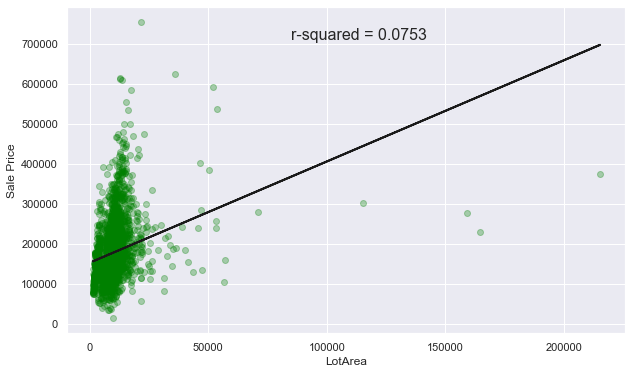

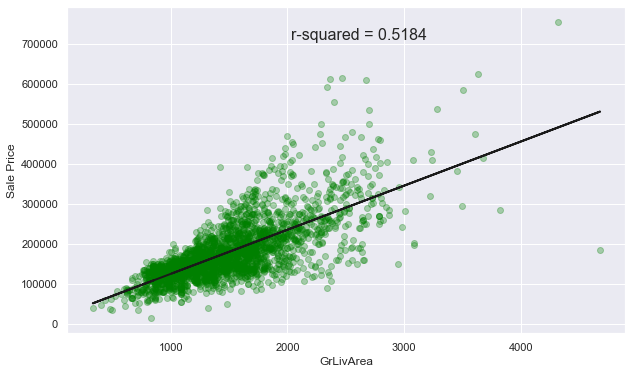

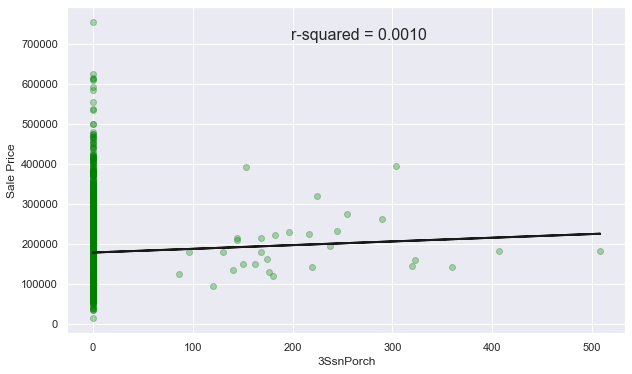

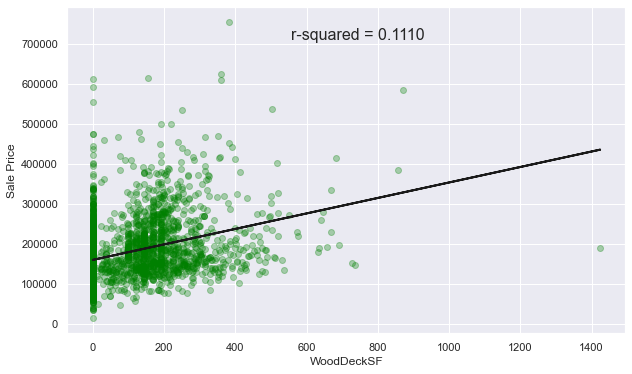

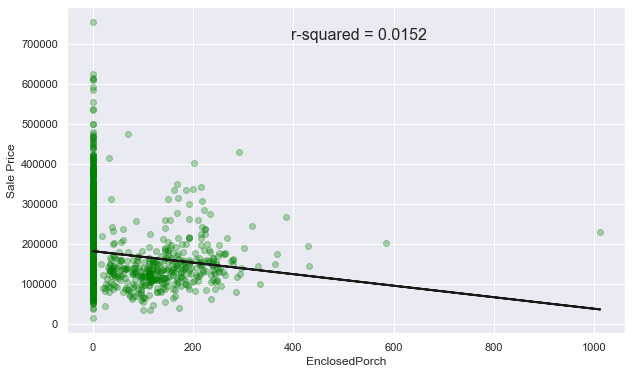

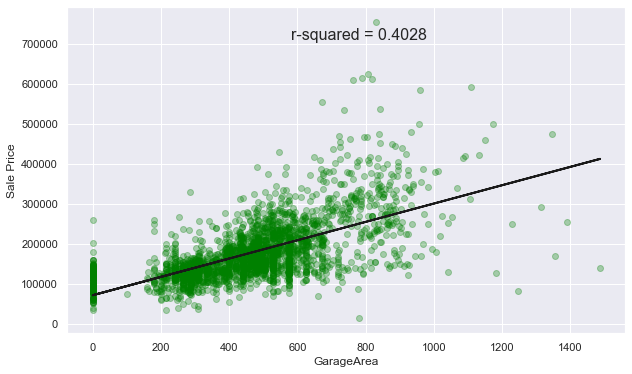

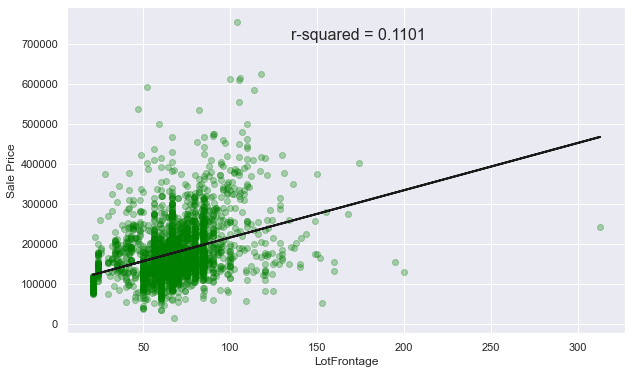

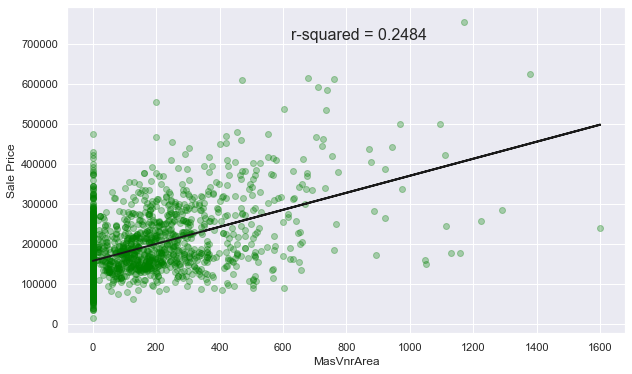

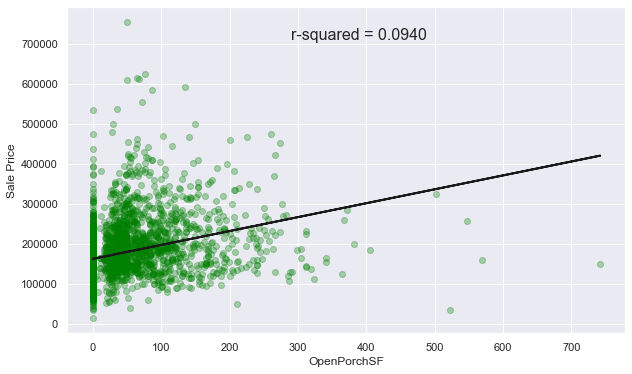

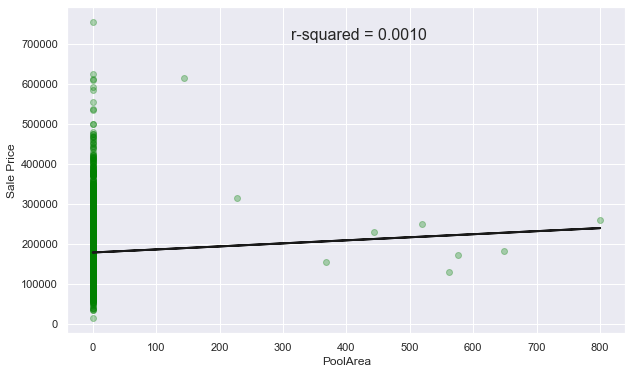

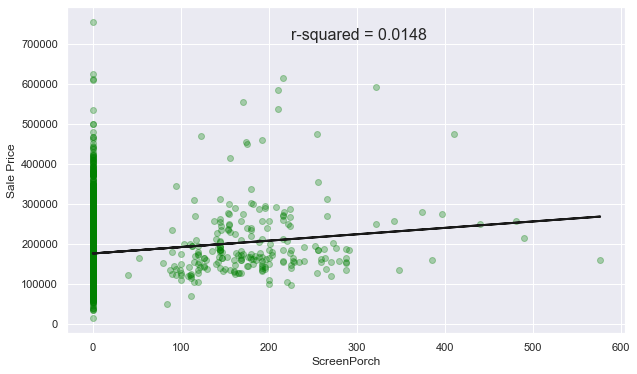

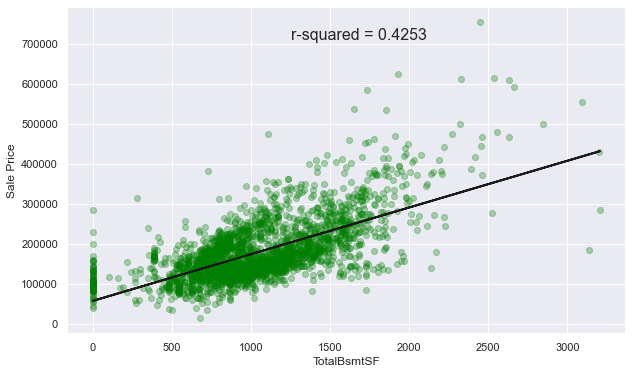

In [129]:
column_name = []
R2 = []

for column in Area:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = Area[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [130]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

Feature  R-Squared
1       GrLivArea   0.518373
11    TotalBsmtSF   0.425312
5      GarageArea   0.402804
7      MasVnrArea   0.248434
3      WoodDeckSF   0.111043
6     LotFrontage   0.110050
8     OpenPorchSF   0.093967
0         LotArea   0.075319
4   EnclosedPorch   0.015187
10    ScreenPorch   0.014753
2       3SsnPorch   0.000977
9        PoolArea   0.000951

In [131]:
GBGVWL = Area[['GrLivArea', 'TotalBsmtSF', 'GarageArea','MasVnrArea', 'WoodDeckSF','LotFrontage']]
GBGVWL.shape

(2580, 6)

In [132]:
GBGVWL.head(3)

GrLivArea  TotalBsmtSF  GarageArea  MasVnrArea  WoodDeckSF  LotFrontage
0           856        856.0       399.0         0.0           0        84.46
1716        708        420.0         0.0         0.0         164        50.00
1717       1430        384.0       400.0         0.0           0        62.00

In [133]:
GBGVWL = GBGVWL.assign(GBGVWL = GBGVWL['GrLivArea'] + GBGVWL['TotalBsmtSF'] + 
                     GBGVWL['GarageArea'] + GBGVWL['MasVnrArea'] + GBGVWL['WoodDeckSF'] +
                      GBGVWL['LotFrontage'])
GBGVWL.head(3)

GrLivArea  TotalBsmtSF  GarageArea  MasVnrArea  WoodDeckSF  LotFrontage  \
0           856        856.0       399.0         0.0           0        84.46   
1716        708        420.0         0.0         0.0         164        50.00   
1717       1430        384.0       400.0         0.0           0        62.00   

       GBGVWL  
0     2195.46  
1716  1342.00  
1717  2276.00

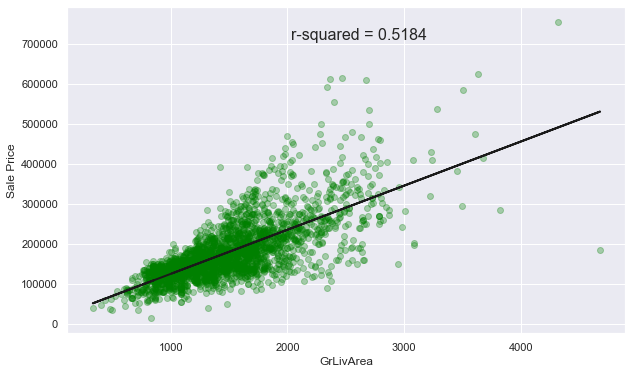

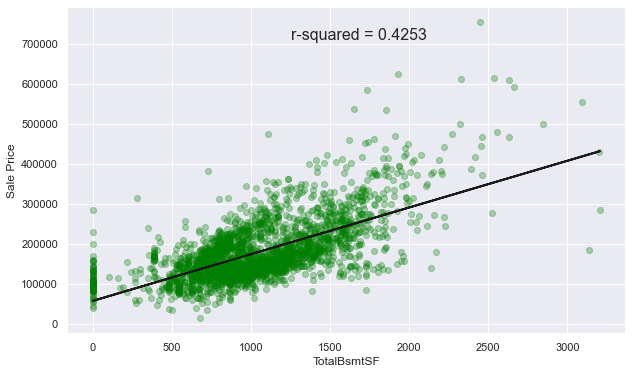

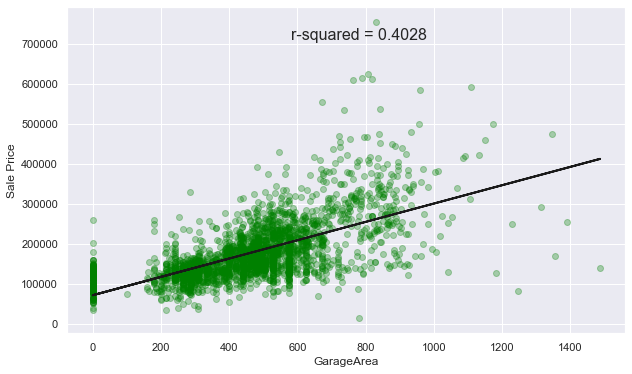

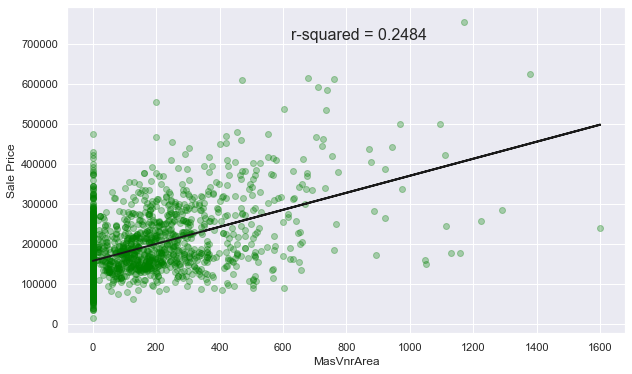

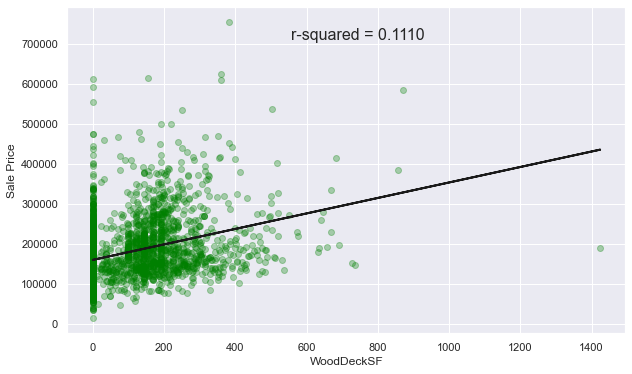

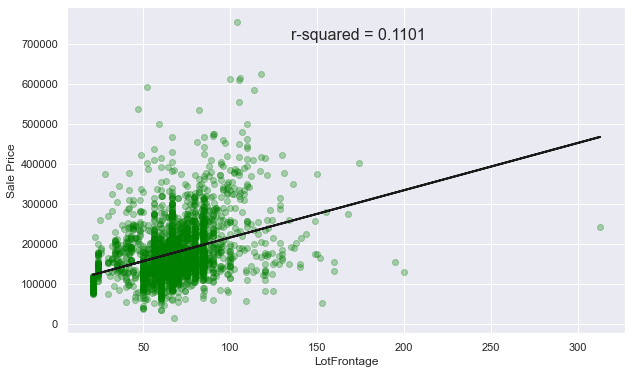

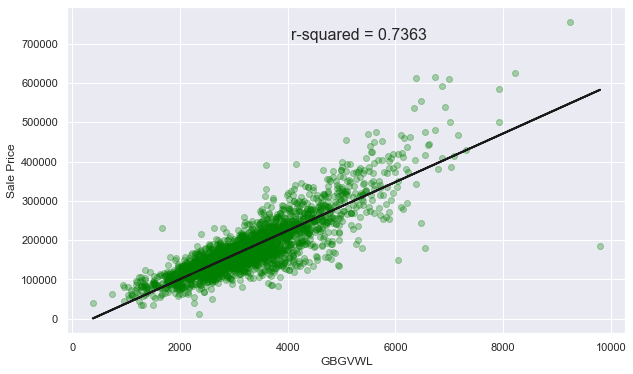

In [134]:
column_name = []
R2 = []

for column in GBGVWL:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = GBGVWL[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [135]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

Feature  R-Squared
6       GBGVWL   0.736339
0    GrLivArea   0.518373
1  TotalBsmtSF   0.425312
2   GarageArea   0.402804
3   MasVnrArea   0.248434
4   WoodDeckSF   0.111043
5  LotFrontage   0.110050

In [136]:
Area.isnull().sum()

LotArea          0
GrLivArea        0
3SsnPorch        0
WoodDeckSF       0
EnclosedPorch    0
GarageArea       0
LotFrontage      0
MasVnrArea       0
OpenPorchSF      0
PoolArea         0
ScreenPorch      0
TotalBsmtSF      0
dtype: int64

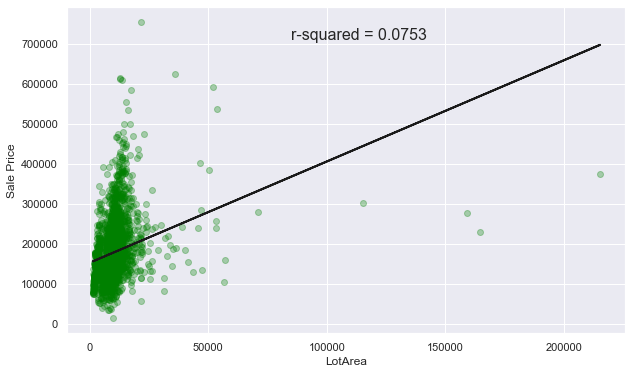

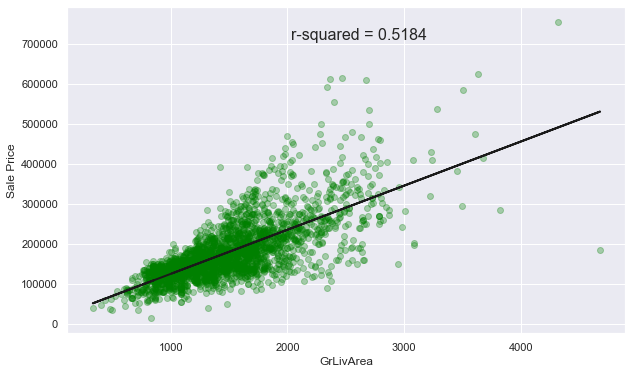

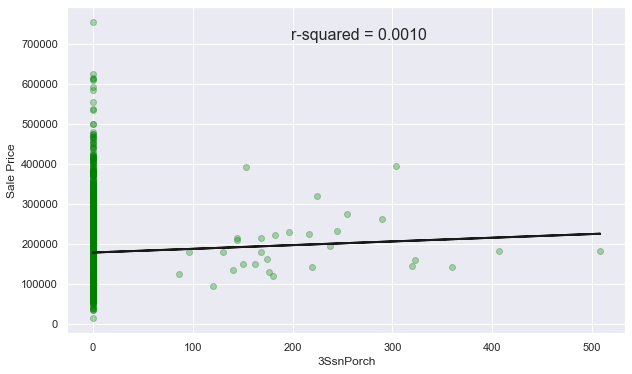

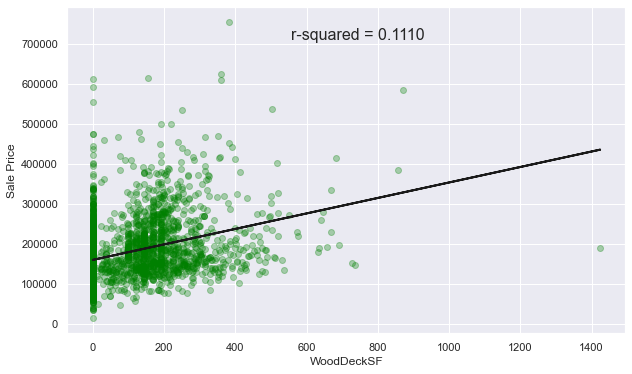

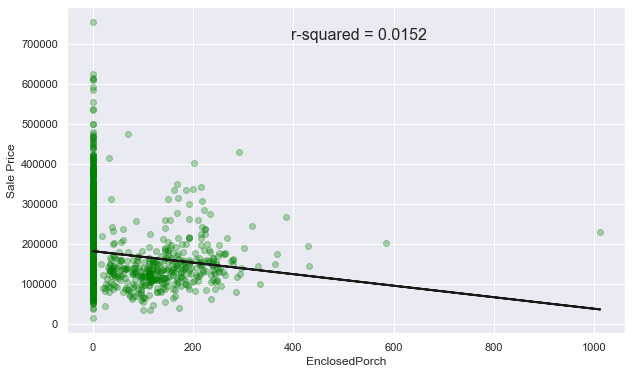

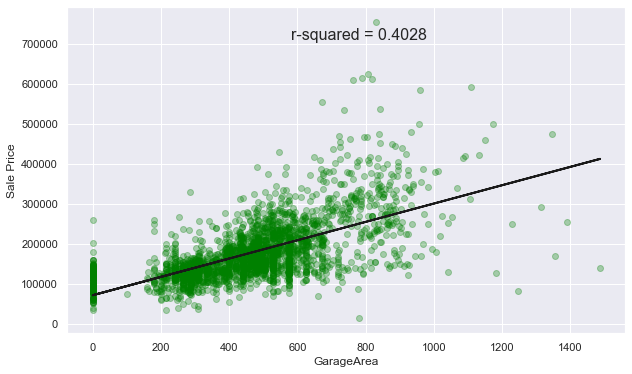

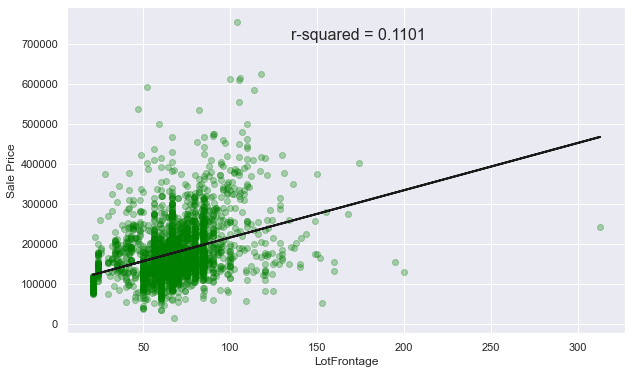

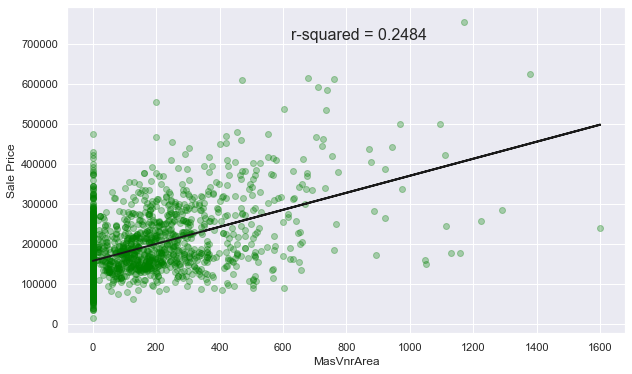

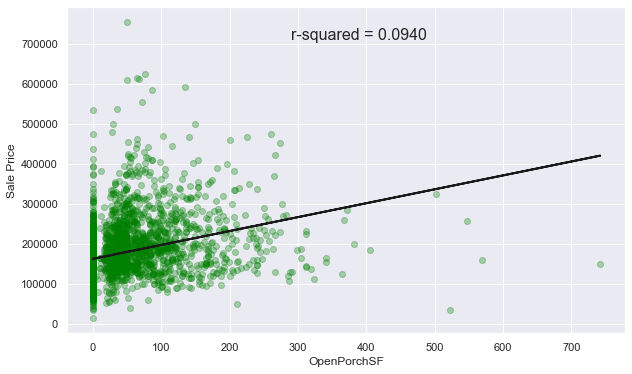

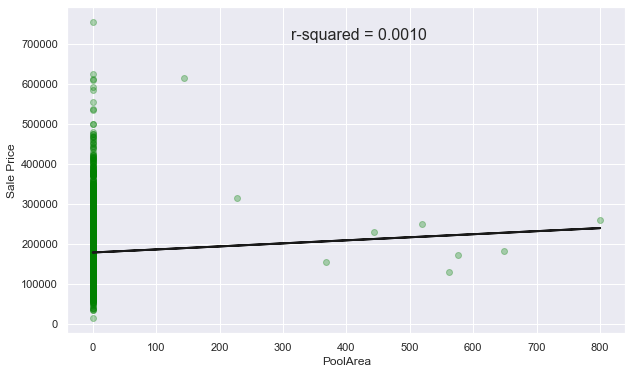

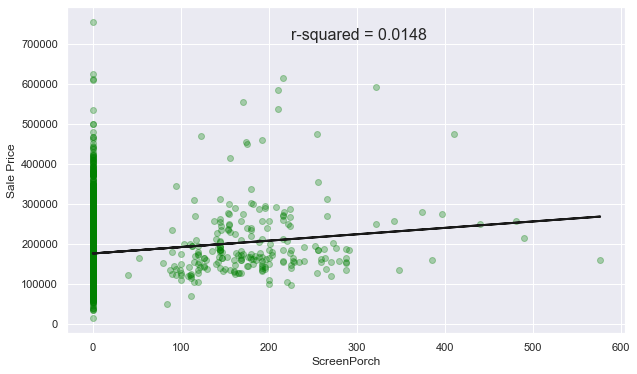

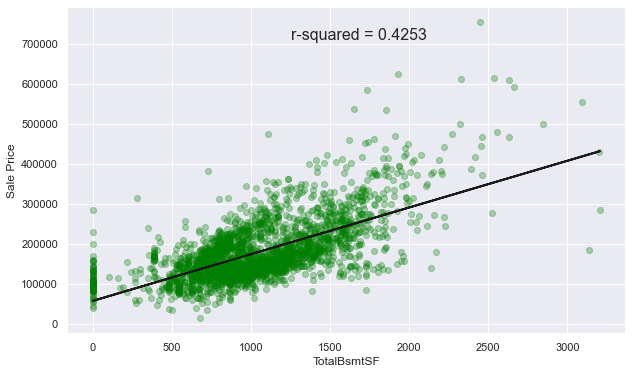

In [137]:
column_name = []
R2 = []

for column in Area:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = Area[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [138]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

Feature  R-Squared
1       GrLivArea   0.518373
11    TotalBsmtSF   0.425312
5      GarageArea   0.402804
7      MasVnrArea   0.248434
3      WoodDeckSF   0.111043
6     LotFrontage   0.110050
8     OpenPorchSF   0.093967
0         LotArea   0.075319
4   EnclosedPorch   0.015187
10    ScreenPorch   0.014753
2       3SsnPorch   0.000977
9        PoolArea   0.000951

## Porch ##

In [139]:
Porch = Area[['OpenPorchSF','EnclosedPorch','ScreenPorch', '3SsnPorch']]
Porch.head(3)

OpenPorchSF  EnclosedPorch  ScreenPorch  3SsnPorch
0               0              0          166          0
1716            0              0            0          0
1717            0              0            0          0

In [140]:
Porch.shape

(2580, 4)

In [141]:
Porch = Porch.assign(TotalPorch = Porch['OpenPorchSF'] + 
             Porch['EnclosedPorch'] + Porch['ScreenPorch'] + Porch['3SsnPorch'])
Porch.head(3)

OpenPorchSF  EnclosedPorch  ScreenPorch  3SsnPorch  TotalPorch
0               0              0          166          0         166
1716            0              0            0          0           0
1717            0              0            0          0           0

In [142]:
Porch.shape

(2580, 5)

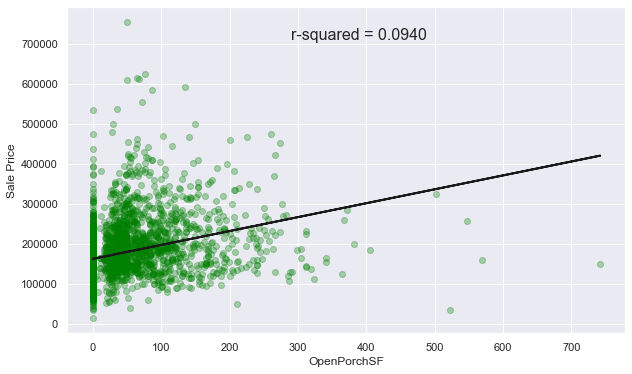

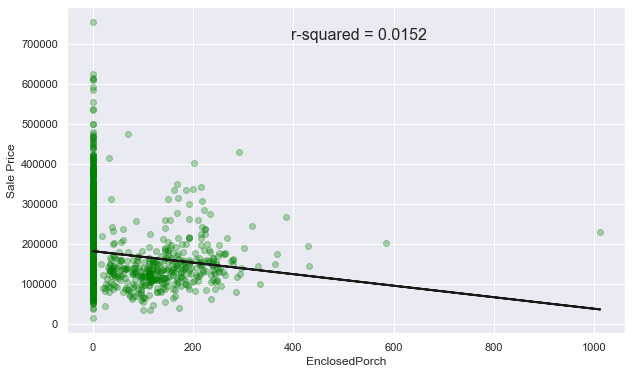

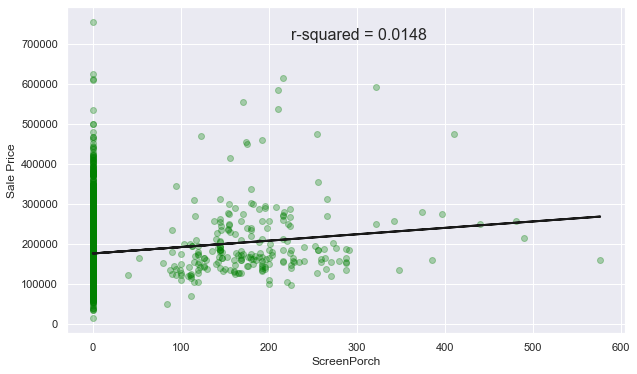

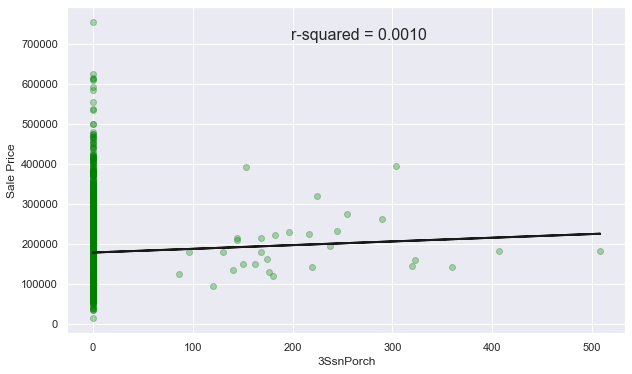

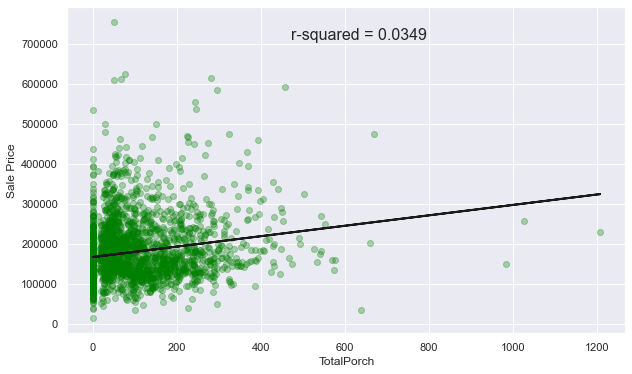

In [143]:
column_name = []
R2 = []

for column in Porch:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = Porch[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [144]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

Feature  R-Squared
0    OpenPorchSF   0.093967
4     TotalPorch   0.034867
1  EnclosedPorch   0.015187
2    ScreenPorch   0.014753
3      3SsnPorch   0.000977

In [145]:
Area = Area.assign(TotalPorch = Porch['OpenPorchSF'] + Porch['EnclosedPorch'] + 
            Porch['ScreenPorch'] + Porch['3SsnPorch'])
Area.head(3)

LotArea  GrLivArea  3SsnPorch  WoodDeckSF  EnclosedPorch  GarageArea  \
0        7890        856          0           0              0       399.0   
1716     5330        708          0         164              0         0.0   
1717     7750       1430          0           0              0       400.0   

      LotFrontage  MasVnrArea  OpenPorchSF  PoolArea  ScreenPorch  \
0           84.46         0.0            0         0          166   
1716        50.00         0.0            0         0            0   
1717        62.00         0.0            0         0            0   

      TotalBsmtSF  TotalPorch  
0           856.0         166  
1716        420.0           0  
1717        384.0           0

In [146]:
Area.shape

(2580, 13)

In [147]:
Check1 = Area[['TotalPorch']]
Check1.head(3)

TotalPorch
0            166
1716           0
1717           0

In [148]:
Check2 = Porch[['TotalPorch']]
Check2.head(3)

TotalPorch
0            166
1716           0
1717           0

In [149]:
Check3 = Check1 - Check2
Check3.head(3)

TotalPorch
0              0
1716           0
1717           0

In [150]:
Check3.sum()

TotalPorch    0
dtype: int64

In [151]:
GBGVWLO = Area[['GrLivArea', 'TotalBsmtSF', 'GarageArea','MasVnrArea', 'WoodDeckSF','LotFrontage','OpenPorchSF']]
GBGVWLO.shape

(2580, 7)

In [152]:
GBGVWLO = GBGVWLO.assign(GBGVWLO = GBGVWLO['GrLivArea'] + GBGVWLO['TotalBsmtSF'] + 
                     GBGVWLO['GarageArea'] + GBGVWLO['MasVnrArea'] + GBGVWLO['WoodDeckSF'] +
                      GBGVWLO['LotFrontage'] + GBGVWLO['OpenPorchSF'])
GBGVWLO.head(3)

GrLivArea  TotalBsmtSF  GarageArea  MasVnrArea  WoodDeckSF  LotFrontage  \
0           856        856.0       399.0         0.0           0        84.46   
1716        708        420.0         0.0         0.0         164        50.00   
1717       1430        384.0       400.0         0.0           0        62.00   

      OpenPorchSF  GBGVWLO  
0               0  2195.46  
1716            0  1342.00  
1717            0  2276.00

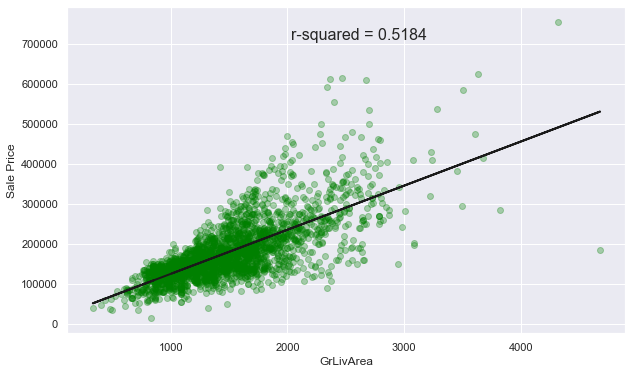

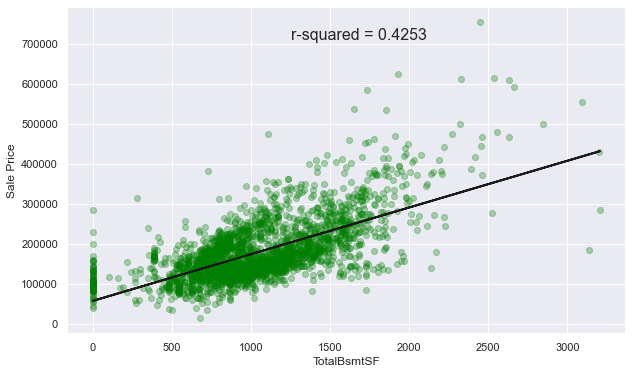

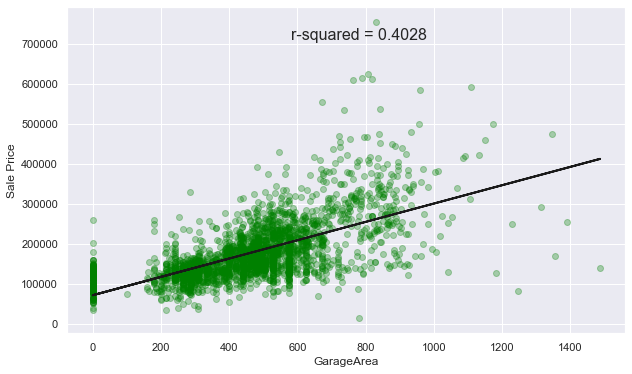

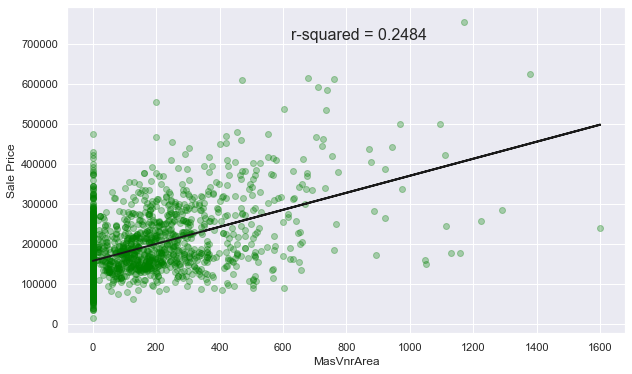

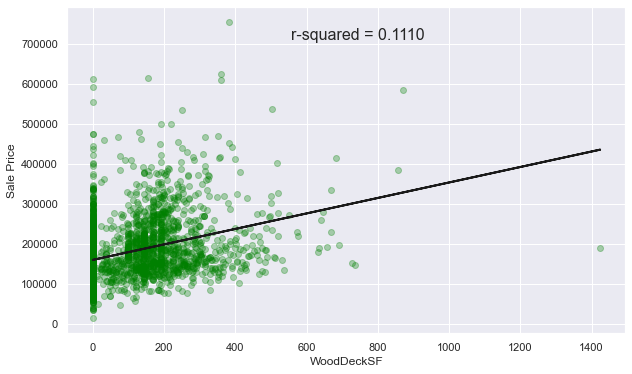

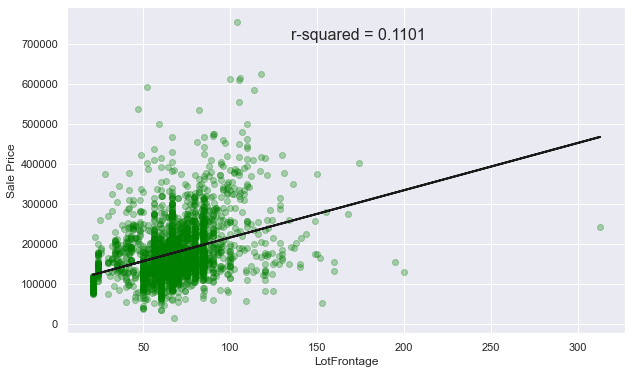

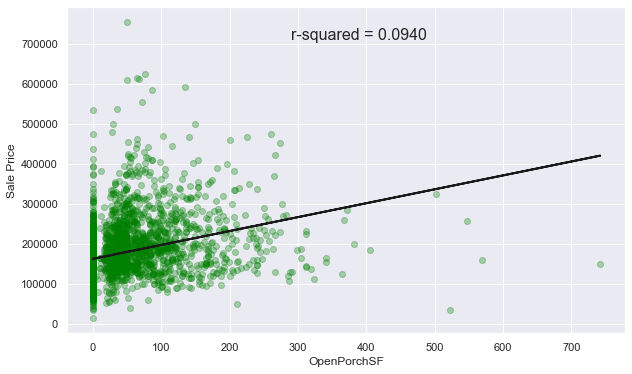

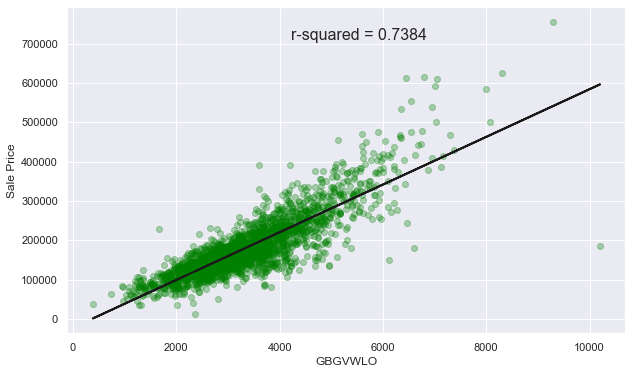

In [153]:
column_name = []
R2 = []

for column in GBGVWLO:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = GBGVWLO[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [154]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

Feature  R-Squared
7      GBGVWLO   0.738392
0    GrLivArea   0.518373
1  TotalBsmtSF   0.425312
2   GarageArea   0.402804
3   MasVnrArea   0.248434
4   WoodDeckSF   0.111043
5  LotFrontage   0.110050
6  OpenPorchSF   0.093967

In [155]:
regressor.coef_

array([[60.59825831]])

In [156]:
regressor.intercept_

array([-21828.23154679])

In [163]:
GBGVWLP = Area[['GrLivArea', 'TotalBsmtSF', 'GarageArea','MasVnrArea', 'WoodDeckSF','LotFrontage','TotalPorch']]
GBGVWLP.shape

(2580, 7)

In [165]:
GBGVWLP = GBGVWLP.assign(GBGVWLP = GBGVWLP['GrLivArea'] + GBGVWLP['TotalBsmtSF'] + 
                     GBGVWLP['GarageArea'] + GBGVWLP['MasVnrArea'] + GBGVWLP['WoodDeckSF'] +
                      GBGVWLP['LotFrontage'] + GBGVWLP['TotalPorch'])
GBGVWLP.head(3)

GrLivArea  TotalBsmtSF  GarageArea  MasVnrArea  WoodDeckSF  LotFrontage  \
0           856        856.0       399.0         0.0           0        84.46   
1716        708        420.0         0.0         0.0         164        50.00   
1717       1430        384.0       400.0         0.0           0        62.00   

      TotalPorch  GBGVWLP  
0            166  2361.46  
1716           0  1342.00  
1717           0  2276.00

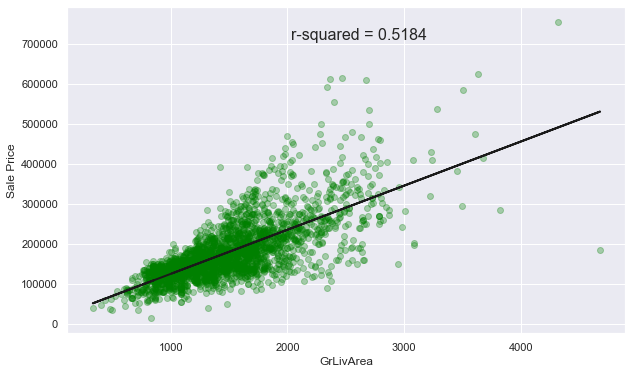

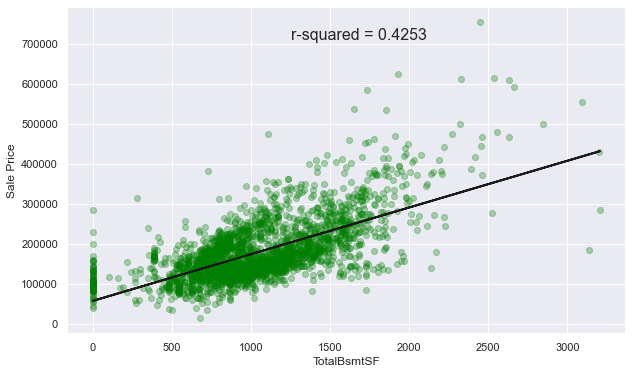

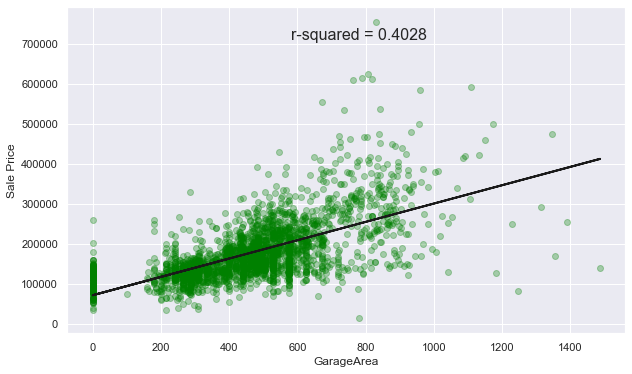

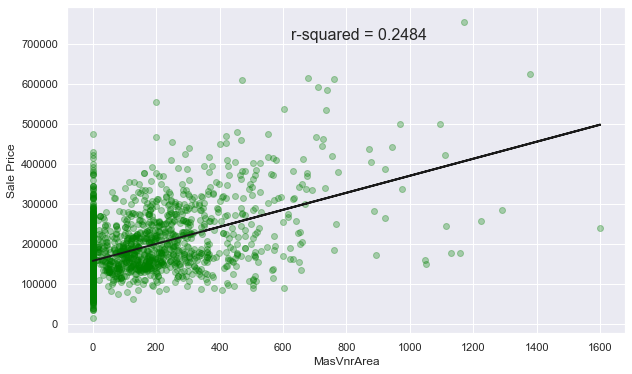

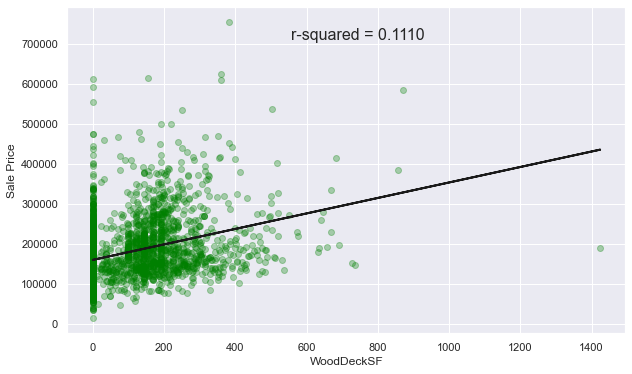

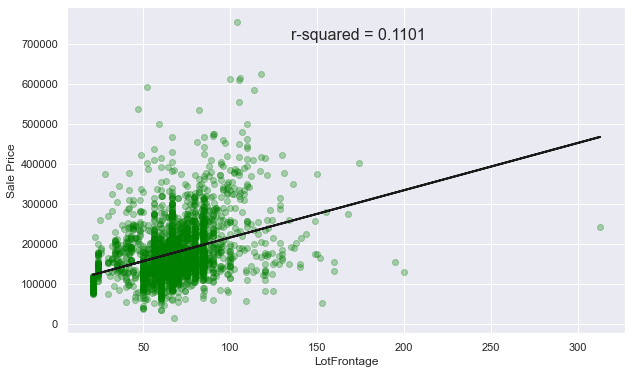

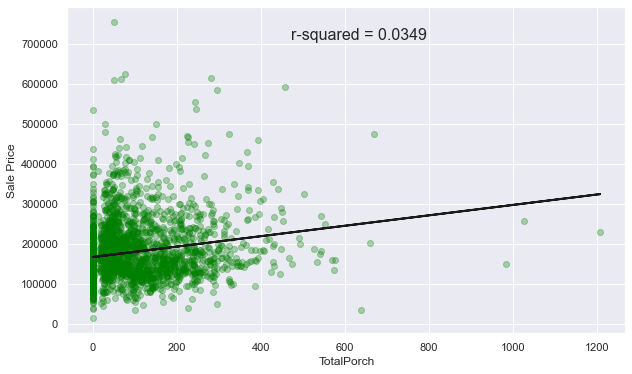

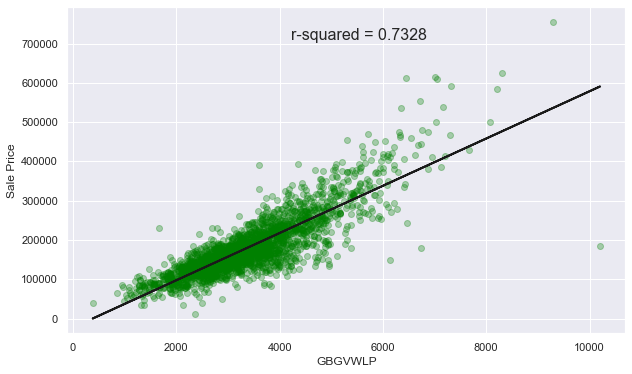

In [166]:
column_name = []
R2 = []

for column in GBGVWLP:

    regressor = LinearRegression()

    y = Target['SalePrice'].values.reshape(-1,1)
    x = GBGVWLP[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [167]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

Feature  R-Squared
7      GBGVWLP   0.732752
0    GrLivArea   0.518373
1  TotalBsmtSF   0.425312
2   GarageArea   0.402804
3   MasVnrArea   0.248434
4   WoodDeckSF   0.111043
5  LotFrontage   0.110050
6   TotalPorch   0.034867

### Conclusion: OpenPorch has marginally better R2 when aggregated to other Area Features than TotalPorch ###

In [ ]:
top_n = 10 
likely_cat = {}
for var in df.columns:
    likely_cat[var] = 1.*df[var].value_counts(normalize=True).head(top_n).sum() > 0.8 
    #or some other threshold

In [ ]:
len(likely_cat)

In [ ]:
print([k for k,v in likely_cat.items() if v == False])

In [ ]:
cont = [k for k,v in likely_cat.items() if v == False]
len(cont)

In [ ]:
top_n = 10 
likely_cat2 = {}
for var in numeric.columns:
    likely_cat2[var] = 1.*numeric[var].value_counts(normalize=True).head(top_n).sum() > 0.8 
    #or some other threshold

In [ ]:
len(likely_cat2)

In [ ]:
cont2 = [k for k,v in likely_cat2.items() if v == False]
len(cont2)

In [ ]:
print([k for k,v in likely_cat2.items() if v == False])

In [ ]:
likely_cat3 = {}
for var in numeric.columns:
    likely_cat3[var] = 1.*numeric[var].nunique()/df[var].count() < 0.05
    #or some other threshold

In [ ]:
len(likely_cat3)

In [ ]:
cont3 = [k for k,v in likely_cat3.items() if v == False]
len(cont3)

In [ ]:
print([k for k,v in likely_cat3.items() if v == False])

In [ ]:
print(set(cont2) ^ set(cont3))